In [1]:
!pip install upgrade statsmodels

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import *
from statsmodels import tsa
from statsmodels.graphics.tsaplots import *
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import default_rng

In [3]:
np.random.seed(42)

In [4]:
sns.set(rc={'figure.figsize':(30,10)})

In [5]:
soi = pd.read_csv('/kaggle/input/time-series-datasets/SOI.txt', delimiter = "\t")
pulsar = pd.read_csv('/kaggle/input/time-series-datasets/pulsar.txt', delimiter = "\t", header = None)
airlines = pd.read_csv('/kaggle/input/time-series-datasets/airlines.csv', header = None)

In [6]:
tsa.stattools.acf(soi['SINGAPOR'].fillna(0))

array([ 1.        ,  0.91628354,  0.7753502 ,  0.61317301,  0.44387498,
        0.27347778,  0.1024105 , -0.06043496, -0.1990878 , -0.32021242,
       -0.41633375, -0.48191397, -0.53070726, -0.55567495, -0.56130498,
       -0.54473441, -0.49564716, -0.43274912, -0.36308993, -0.2832169 ,
       -0.19556755, -0.09814803,  0.00142599,  0.10214483,  0.21212077,
        0.31349692,  0.39651042])

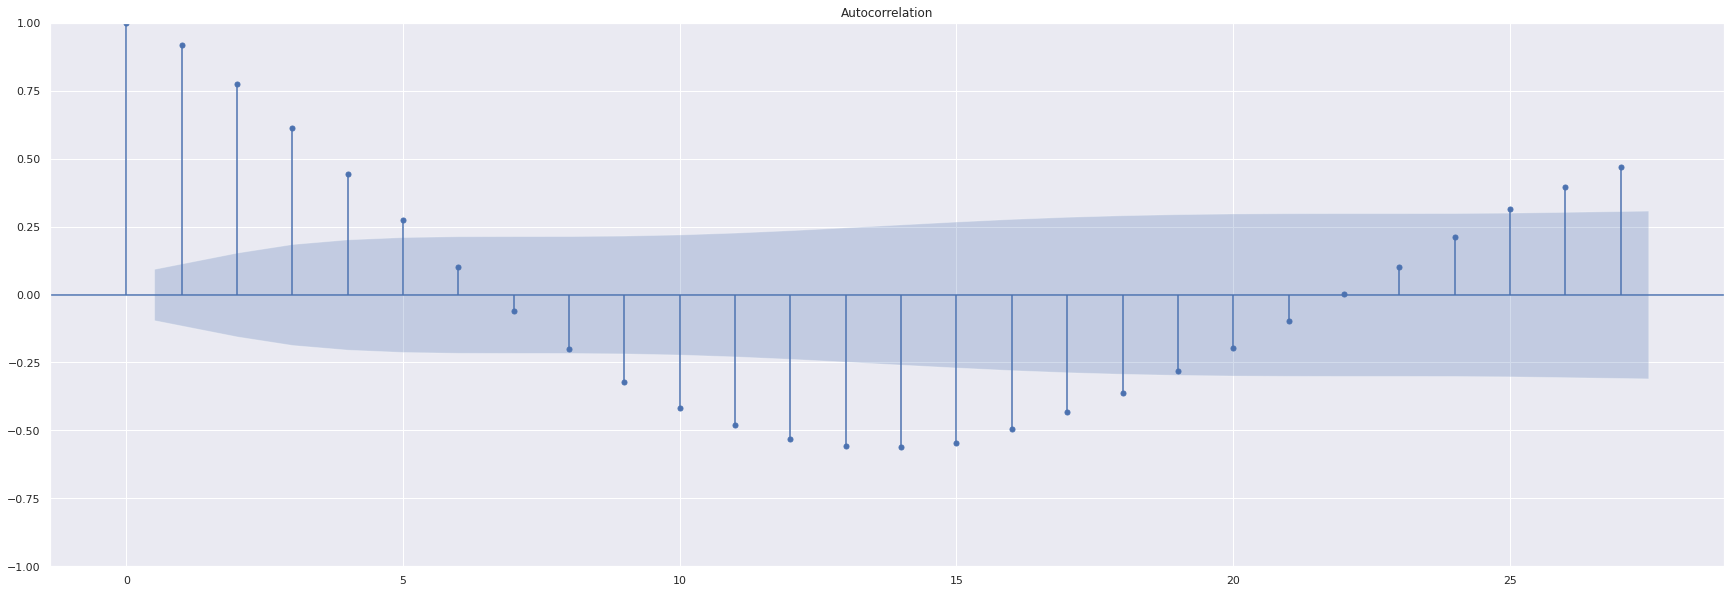

In [7]:
plot_acf(soi['SINGAPOR'].fillna(0))
plt.show()

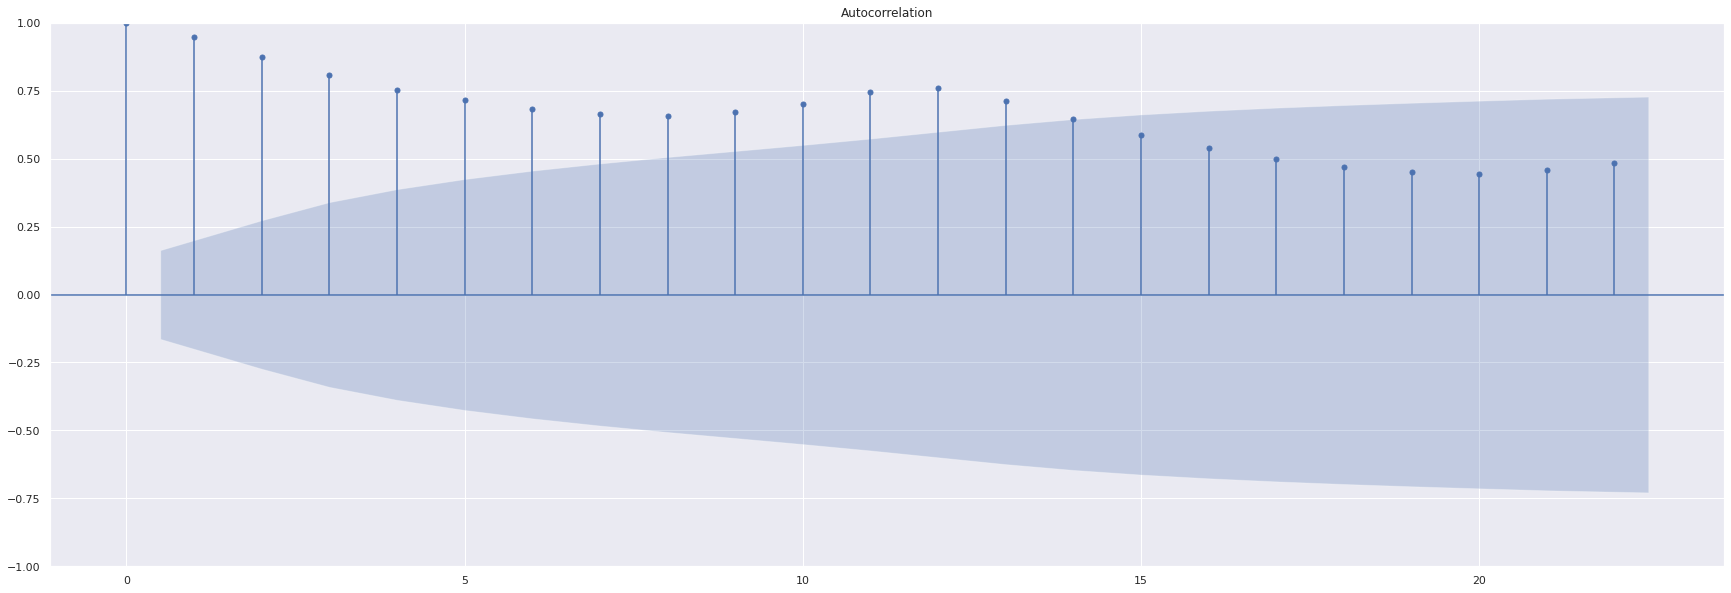

In [8]:
plot_acf(airlines)
plt.show()

<AxesSubplot:>

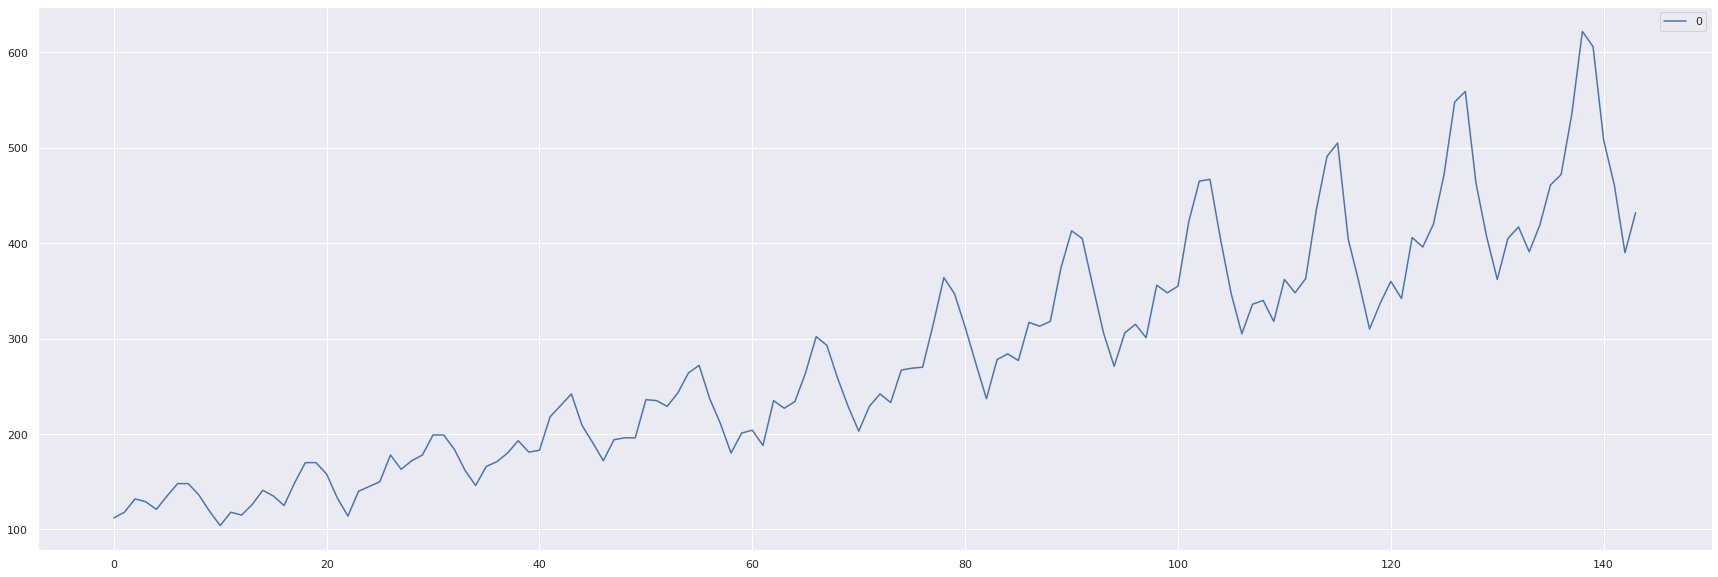

In [9]:
airlines.plot()

Autoregression AR(2) $X_t = c_1 X_{t-1} + c_2 X_{t-2} + W_{t}$

In [10]:
rng = default_rng()

In [11]:
def create_ar(p, coefs, time_points):
    """
    creates an Ar(p) process with coefficients coefs
    where coefs[i] is the multiplier of X[t-i]
    i.e. X[t] = c[1]*X[t-1] + c[2]*X[t-2] + ... + W[t]
    """
    X = rng.normal(size = p).tolist()
    time = np.arange(p, time_points)
    print(p)
    W = np.random.normal(0, scale = 1.0, size = (time_points,))
    for t in time:
        Xt = W[t]
        for i, c in enumerate(coefs):
            Xt += c*X[t-(i+1)]
        X.append(Xt)
    return np.array(X)

def create_ma(q, coefs, time_points):
    """
    creates an Ar(p) process with coefficients coefs
    where coefs[i] is the multiplier of X[t-i]
    i.e. X[t] = c[1]*X[t-1] + c[2]*X[t-2] + ... + W[t]
    """
    X = rng.normal(size = q).tolist()
    time = np.arange(0, time_points)
    W = np.random.normal(0, scale = 1.0, size = (time_points,))
    for t in time:
        Xt = W[t]
        for i, c in enumerate(coefs):
            Xt += c*W[t-(i+1)]
        X.append(Xt)
    return np.array(X)
            
    
def create_arma(p, q, phis, thetas, time_points):
    X = rng.normal(size = max(p,q)).tolist()
    time = np.arange(0, time_points)
    W = np.random.normal(0, scale = 1.0, size = (time_points,))
    for t in time:
        Xt = W[t]
        for i in range(q):
            Xt += thetas[i]*W[t-(i+1)]
        for i in range(p):
            Xt += phis[i]*X[t-(i+1)]
        X.append(Xt)
        
    return np.array(X)
    
            

In [12]:
X = create_ar(3, [0.7, 0.4, -0.3], 1000)
pacf(X)

3


array([ 1.        ,  0.80658882,  0.19734838, -0.27967088, -0.0285691 ,
        0.05625838, -0.00534003, -0.00749602, -0.01352286,  0.05922046,
       -0.00420727, -0.02792764, -0.02369695, -0.0124749 , -0.00279474,
       -0.00405947,  0.00828458, -0.02308887,  0.01062599, -0.01581054,
       -0.01816405,  0.06203303,  0.04317683, -0.02189048, -0.03259331,
        0.00502151,  0.04811949, -0.00367825, -0.03282435,  0.0020606 ,
       -0.01888096])

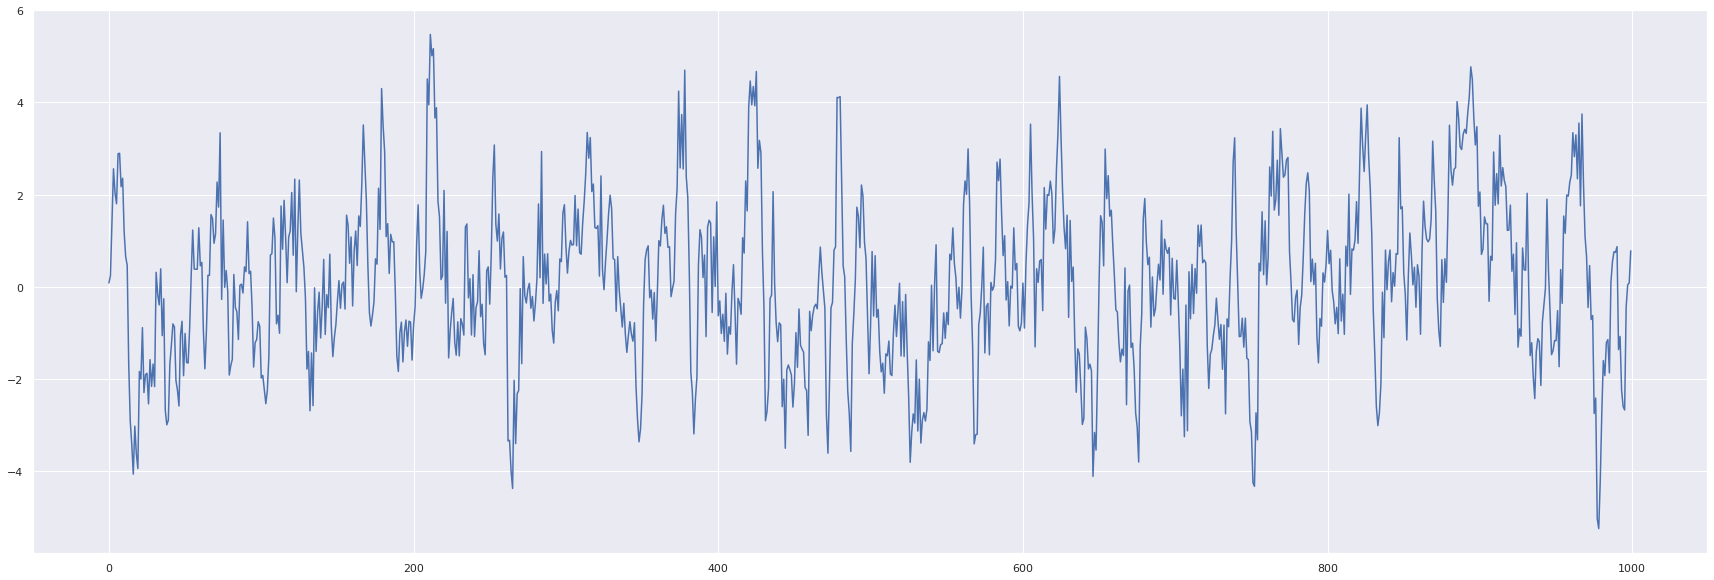

In [13]:
plt.plot(X)

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


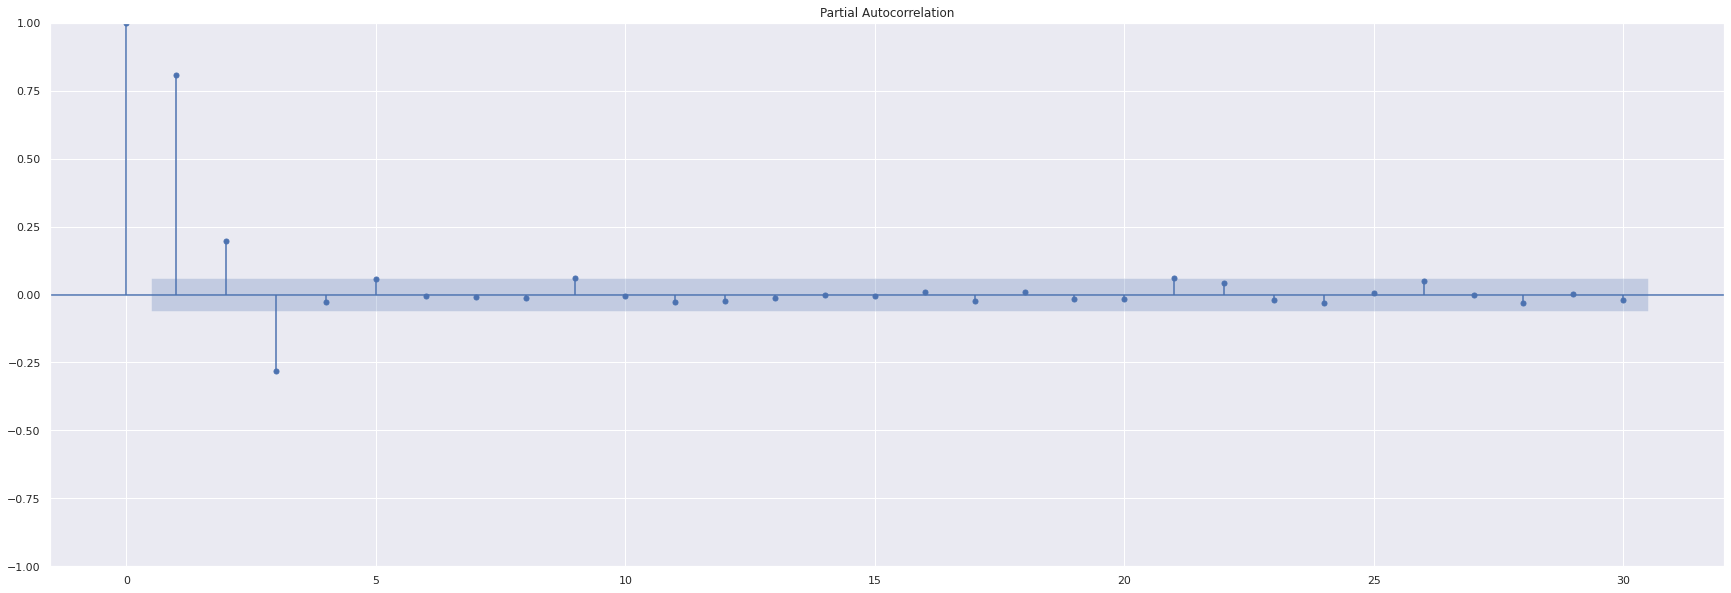

In [14]:
plot_pacf(X)
plt.show()

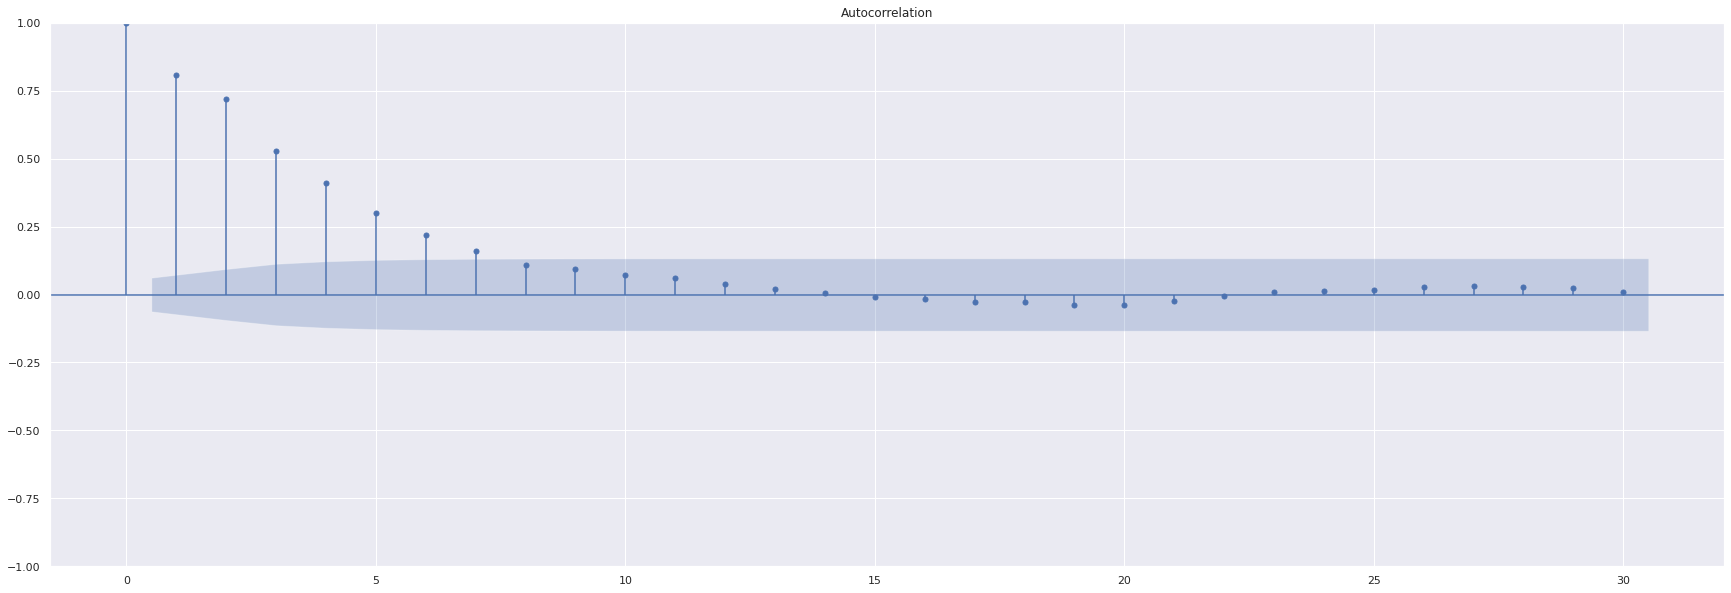

In [15]:
plot_acf(X)
plt.show()

In [16]:
coefs = [0.7, 0.4, -.3]

In [17]:
X = create_ma(3, coefs, 1000)
pacf(X)

array([ 1.        ,  0.49736781, -0.18153803, -0.18383474,  0.25076167,
       -0.16805096, -0.06315937,  0.13582585, -0.12905963,  0.05292762,
        0.08377186, -0.10439643,  0.02438846,  0.00466359, -0.0834411 ,
        0.03520074,  0.03935652, -0.06199476,  0.05462427, -0.0419542 ,
       -0.02179621,  0.09345454, -0.02675486, -0.03311875,  0.02830887,
        0.00287946,  0.04797065, -0.00585763,  0.01632818,  0.05782306,
        0.02479992])

Text(0.5, 1.0, 'MA(3) [0.7, 0.4, -0.3]')

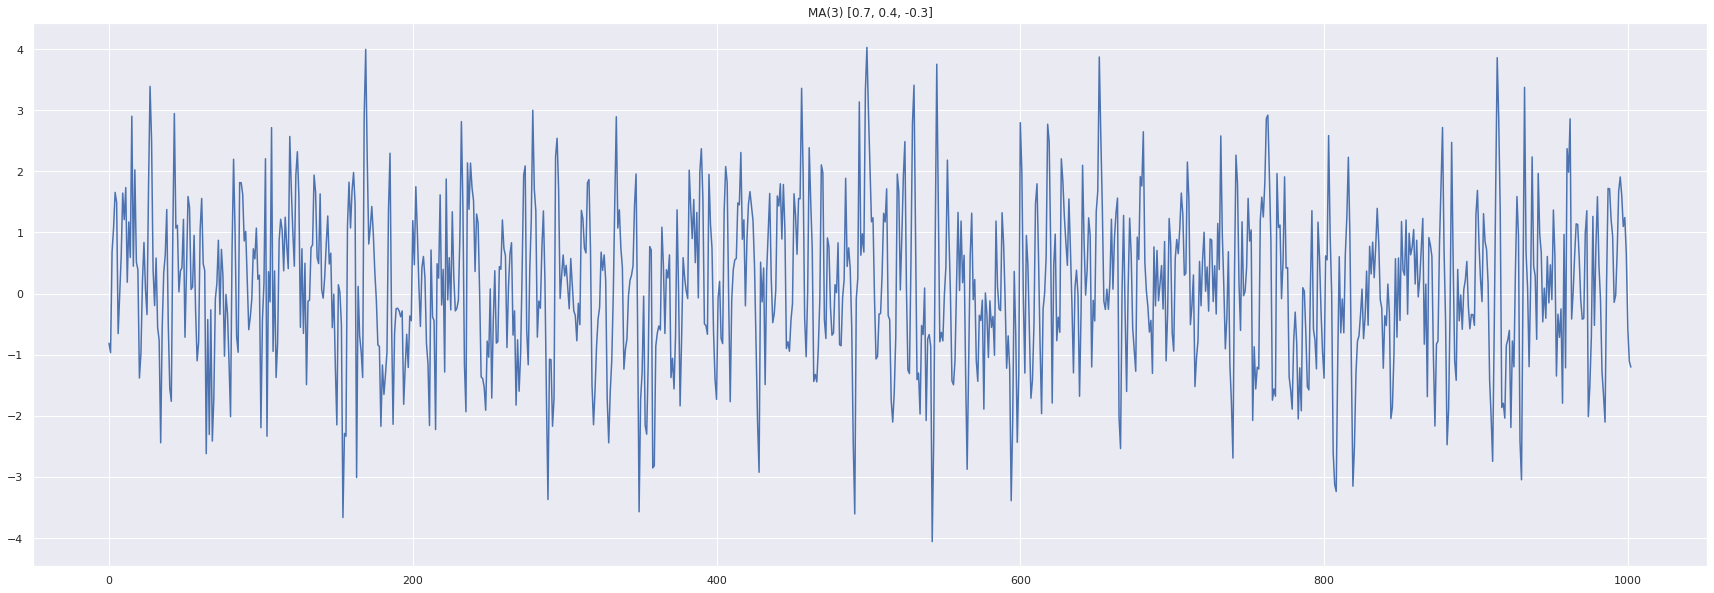

In [18]:
plt.plot(X)
plt.title(f"MA(3) {coefs}")

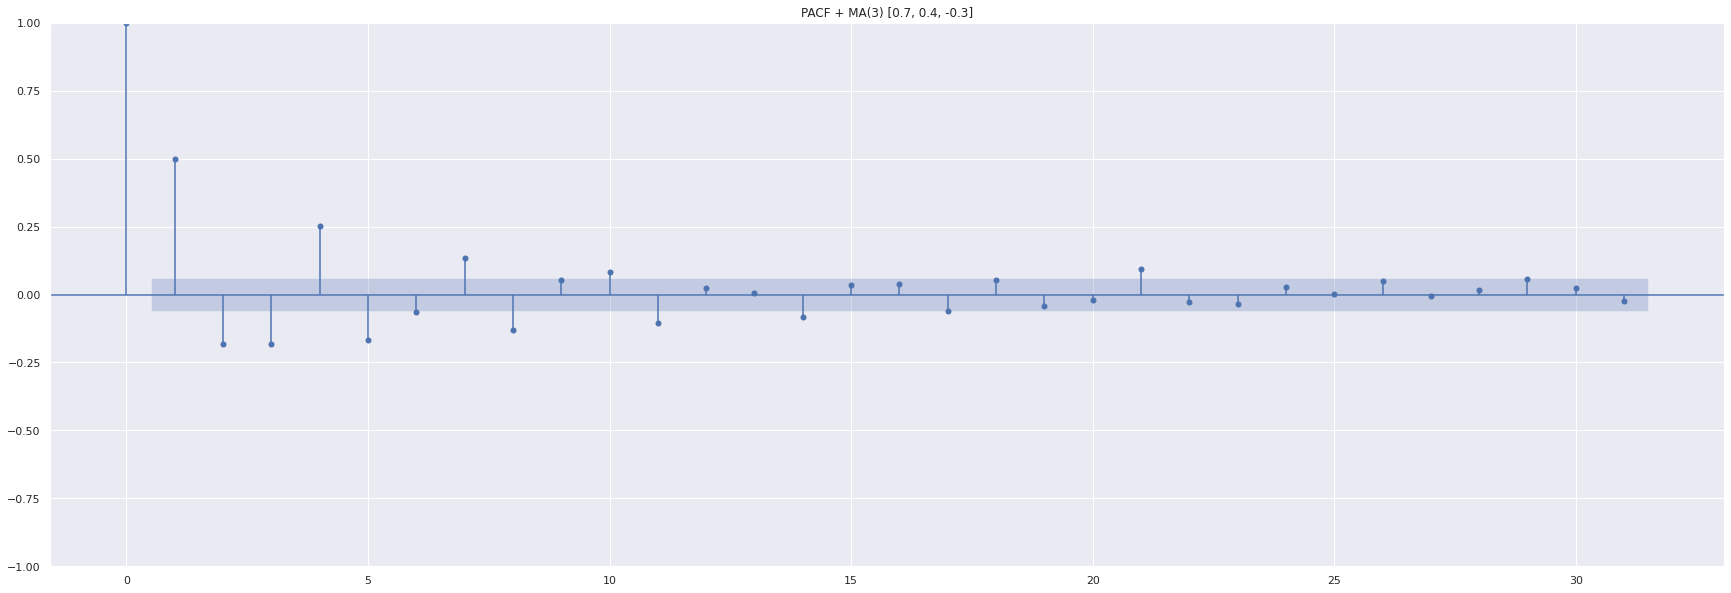

In [19]:
plot_pacf(X)
plt.title(f"PACF + MA(3) {coefs}")
plt.show()

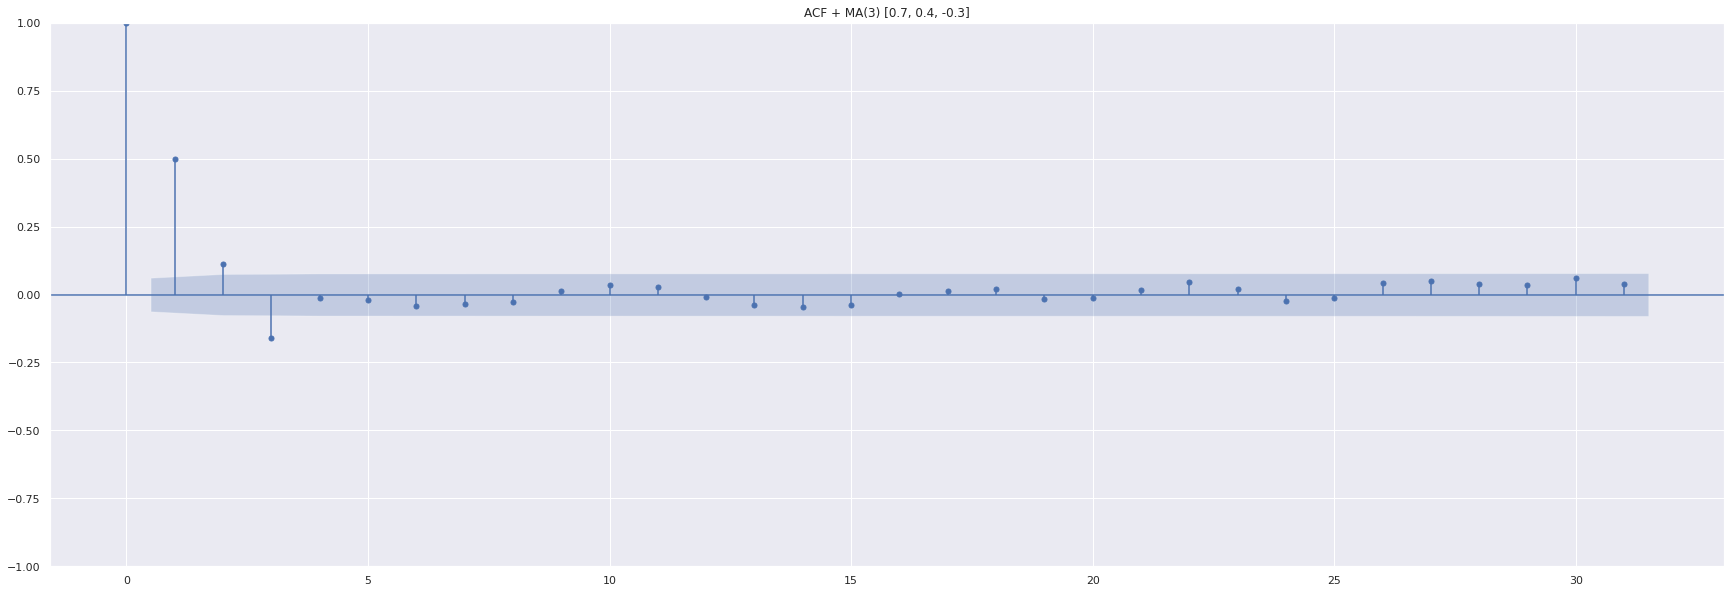

In [20]:
plot_acf(X)
plt.title(f"ACF + MA(3) {coefs}")
plt.show()

[ 1.00000000e+00  4.54764263e-01 -3.01285509e-01  1.79459612e-01
 -1.05922653e-01  1.15933643e-01 -5.11548810e-02  4.60278044e-02
 -4.19181697e-02  2.68176950e-02  1.43794495e-03 -9.18983873e-04
 -5.35315043e-02  7.18903790e-02  9.83453895e-03  3.07403849e-02
  1.04884682e-02 -3.59802016e-02 -1.28173838e-02 -1.29975564e-02
  2.20186109e-02 -4.22179377e-02  1.66035652e-02 -3.63341802e-02
  8.78754550e-02  1.91395093e-03 -6.96987255e-03 -5.99604629e-02
 -1.17126139e-02  2.26557510e-02 -6.25043041e-03]


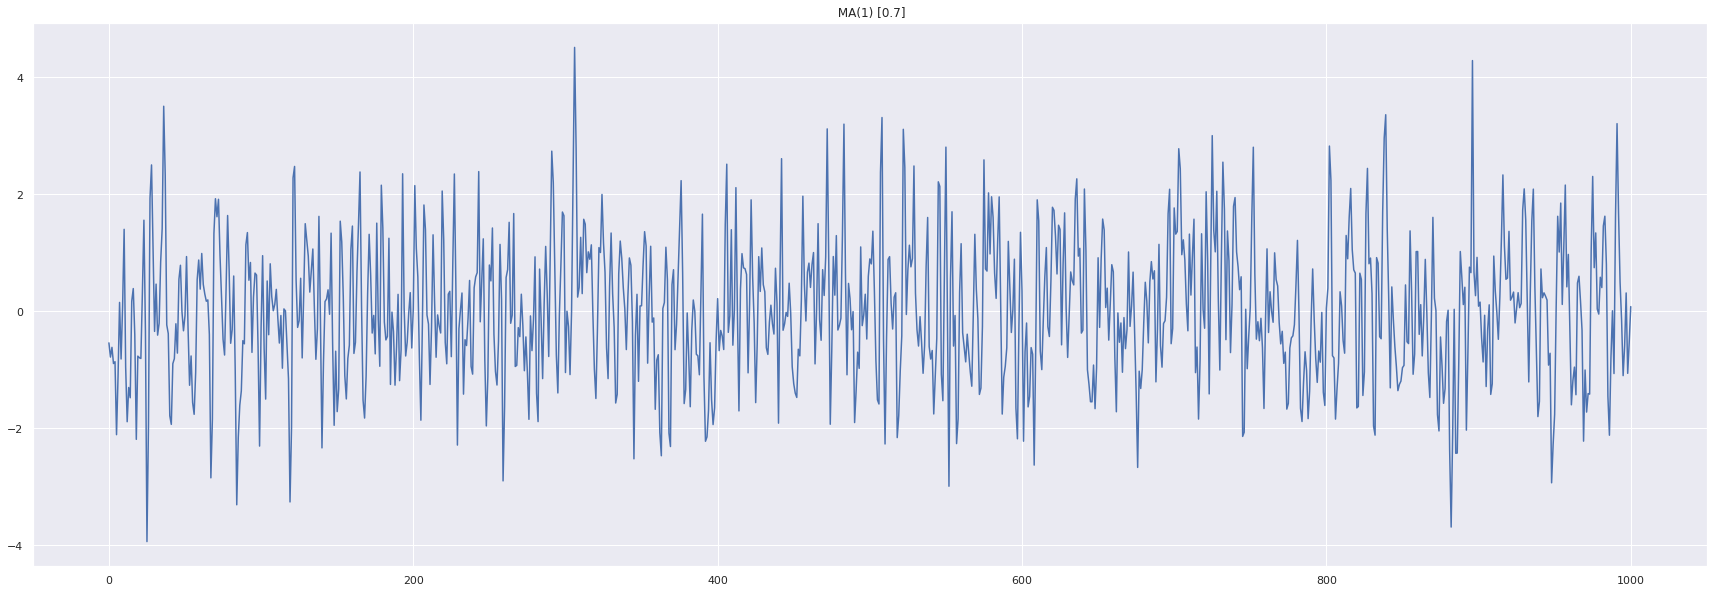

In [21]:
coefs = [0.7]
X = create_ma(1, coefs, 1000)
print(pacf(X))
plt.title(f" MA(1) {coefs}")
plt.plot(X)

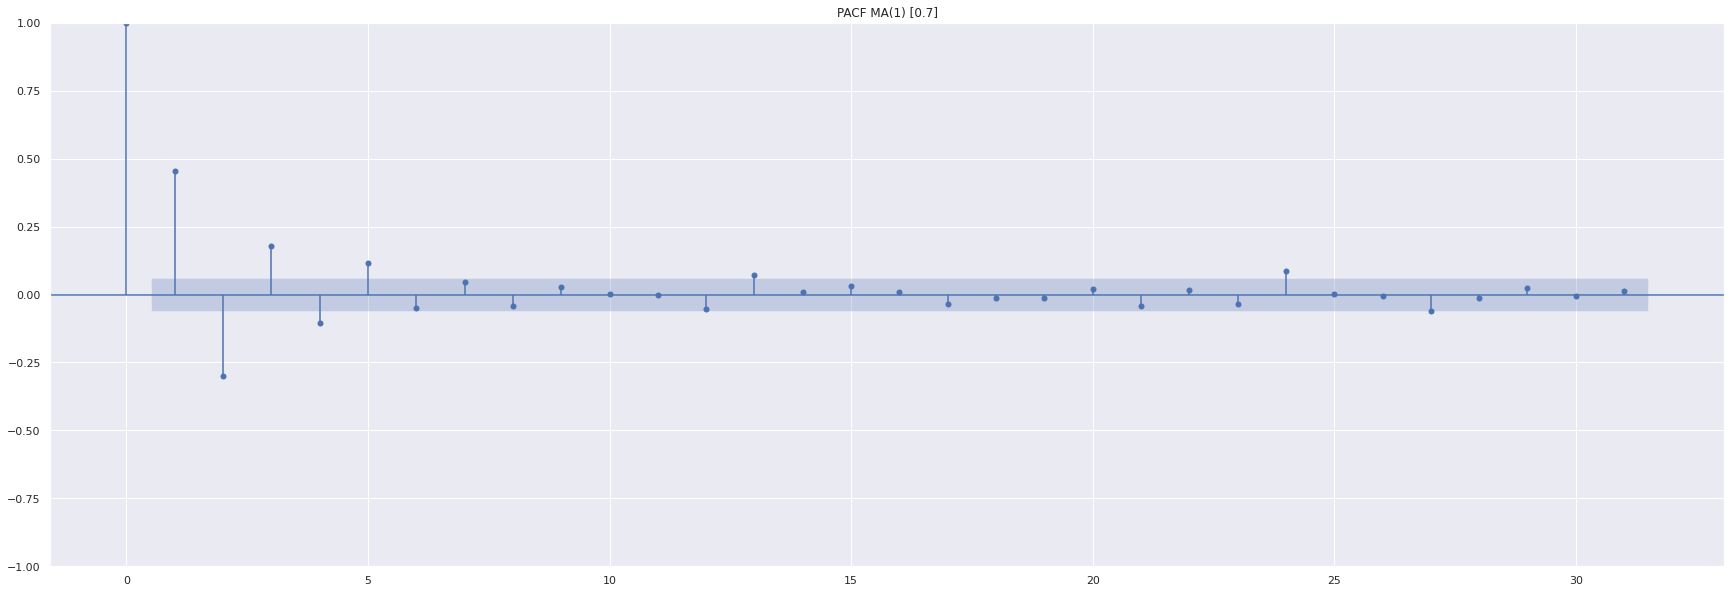

In [22]:
plot_pacf(X)
plt.title(f"PACF MA(1) {coefs}")
plt.show()

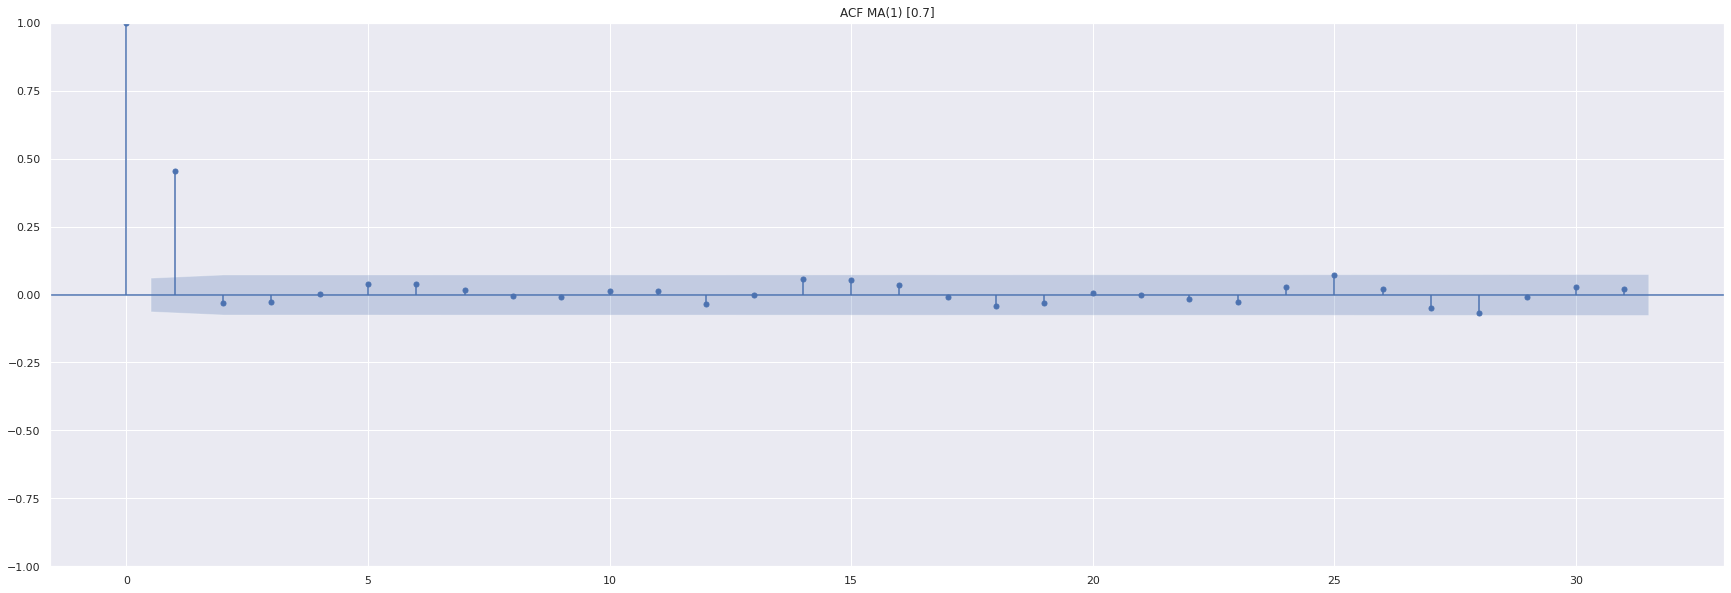

In [23]:
plot_acf(X)
plt.title(f"ACF MA(1) {coefs}")
plt.show()

1
[ 1.          0.67930213  0.00479008  0.03911805  0.05676941 -0.01169778
 -0.01216972  0.01681933 -0.01193502 -0.03031896 -0.02261245  0.04785897
 -0.00904617 -0.02292572  0.05252919 -0.00992654 -0.00297396 -0.01366875
 -0.01001578  0.03588492  0.05569507 -0.006104    0.03665263  0.02306104
 -0.02854072  0.01113881  0.02677626  0.03697334  0.02100053  0.04602225
  0.01864745]


Text(0.5, 1.0, 'AR(1), [0.7]')

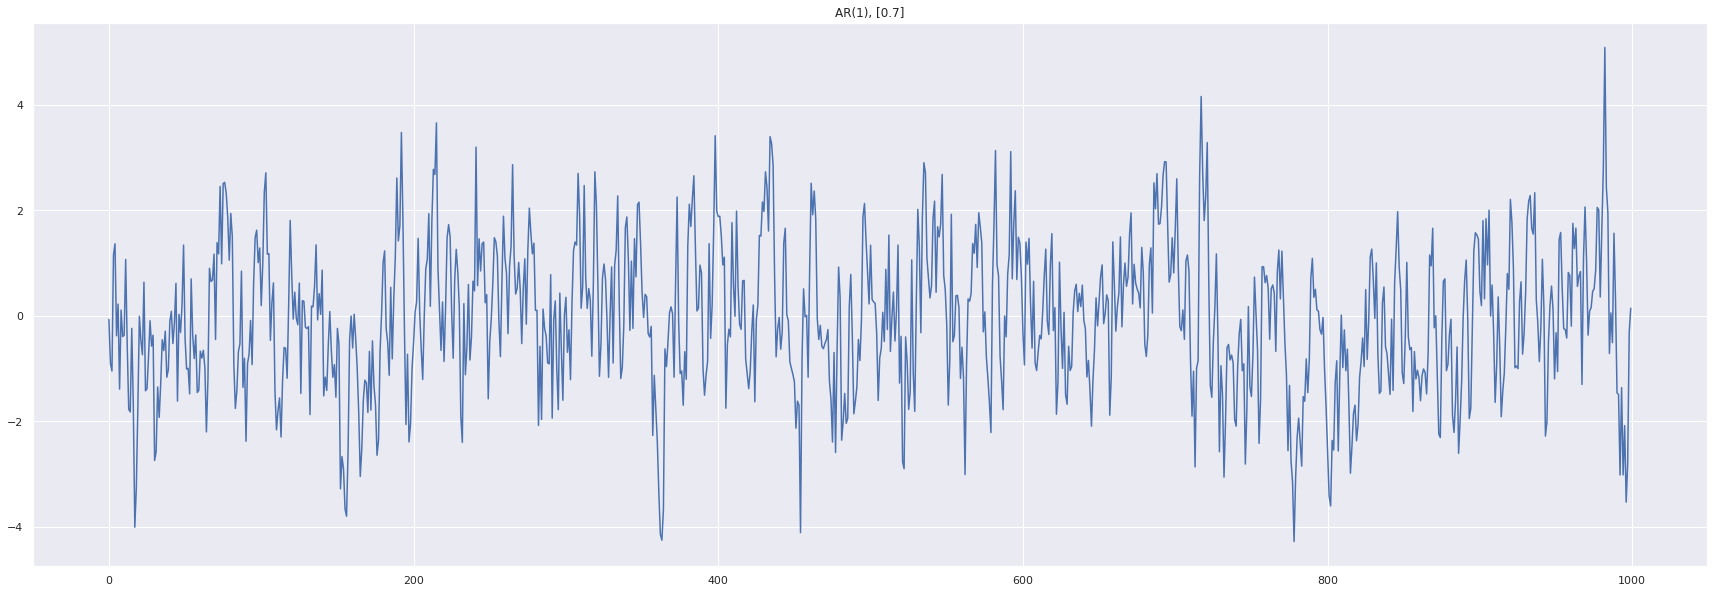

In [24]:
X = create_ar(1, coefs, 1000)
print(pacf(X))
plt.plot(X)
plt.title(f"AR(1), {coefs}")

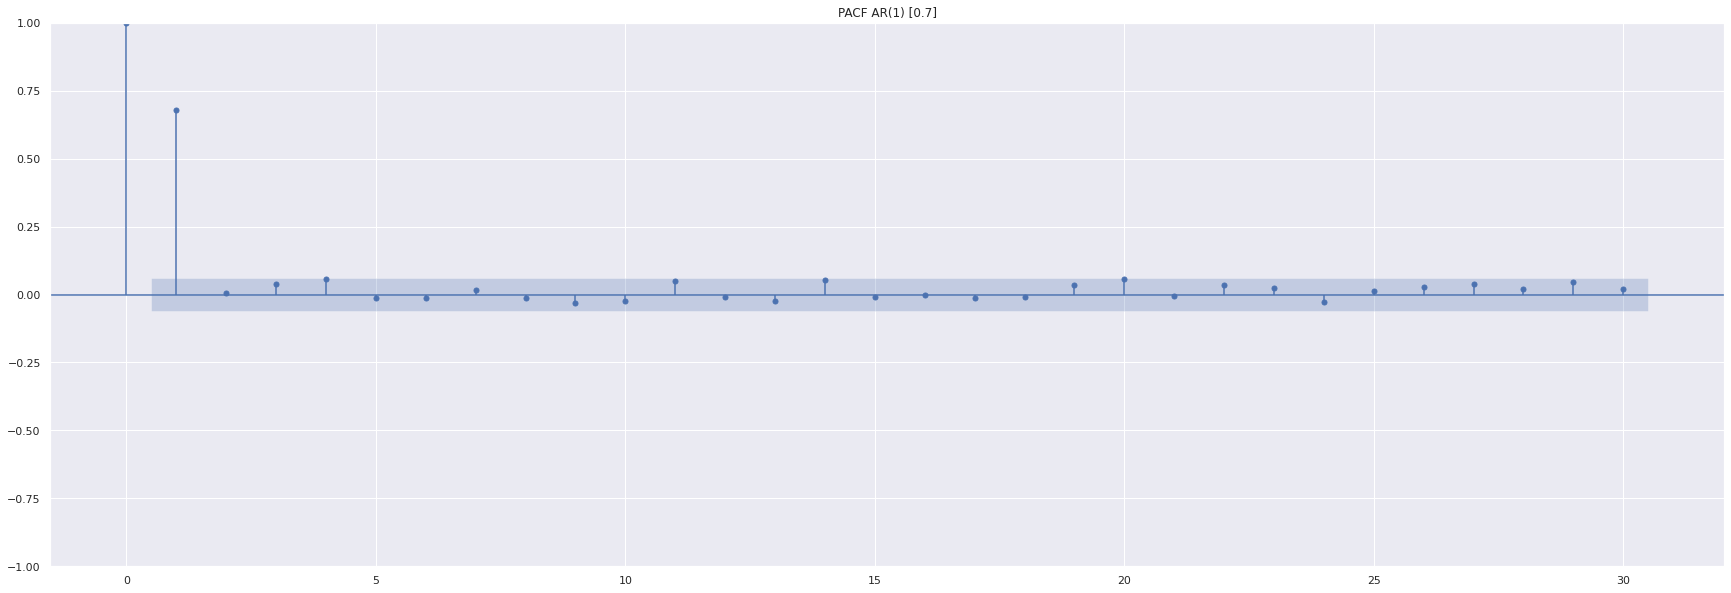

In [25]:
plot_pacf(X)
plt.title(f"PACF AR(1) {coefs}")
plt.show()

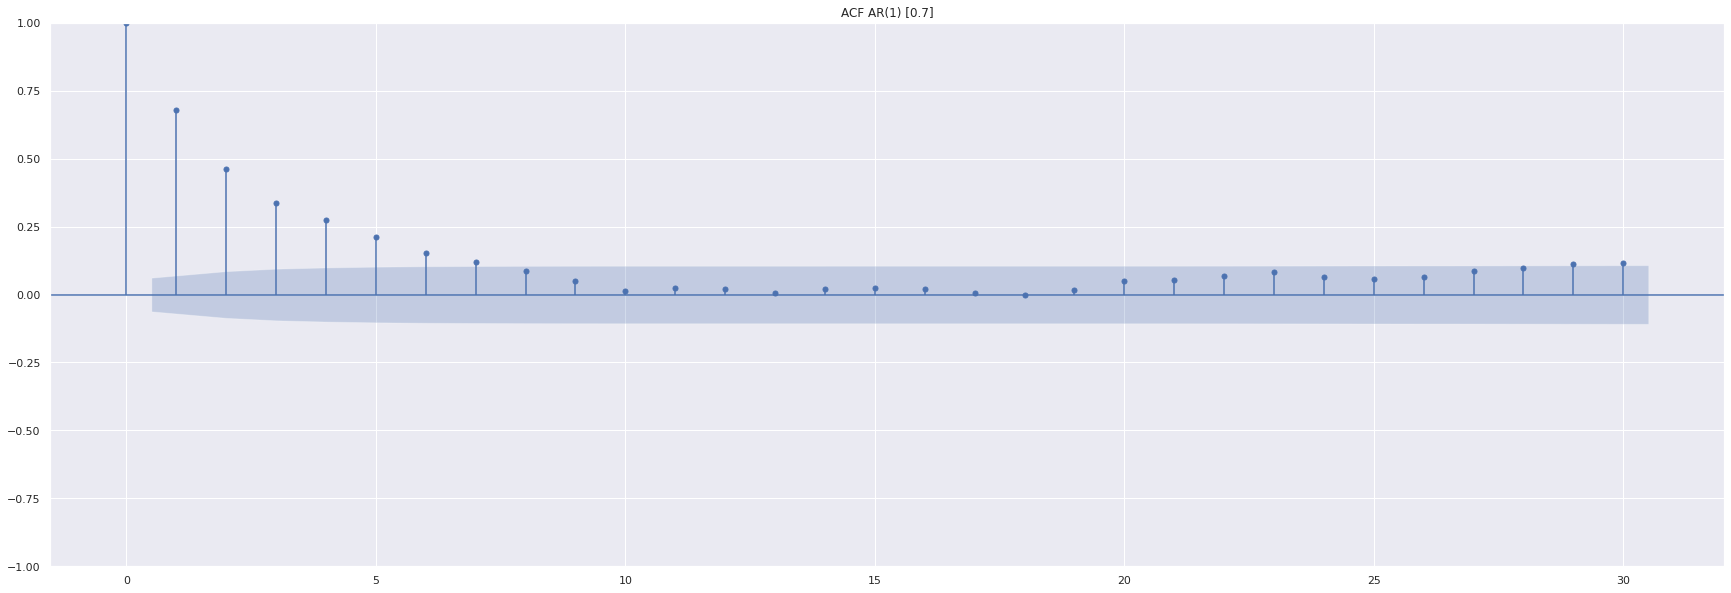

In [26]:
plot_acf(X)
plt.title(f"ACF AR(1) {coefs}")
plt.show()

1
[ 1.00000000e+00 -7.21811206e-01  5.51768073e-03  1.84392897e-02
 -2.62210507e-02 -1.61704677e-04 -4.46513807e-02  2.31382276e-02
 -4.62390058e-02  5.39042917e-03 -2.66212363e-02  2.85866973e-02
  1.62055677e-02  2.68194094e-02  2.21462030e-03  4.27051137e-03
  2.60832389e-02 -4.31728759e-02  1.77580814e-02  1.36468421e-03
  1.76064425e-02 -4.25177253e-02 -3.06422182e-02 -3.93201343e-02
 -3.05398026e-02  1.07008830e-02  6.89917367e-04  3.98867931e-02
  4.55648802e-02 -2.64677827e-03 -4.74463197e-02]


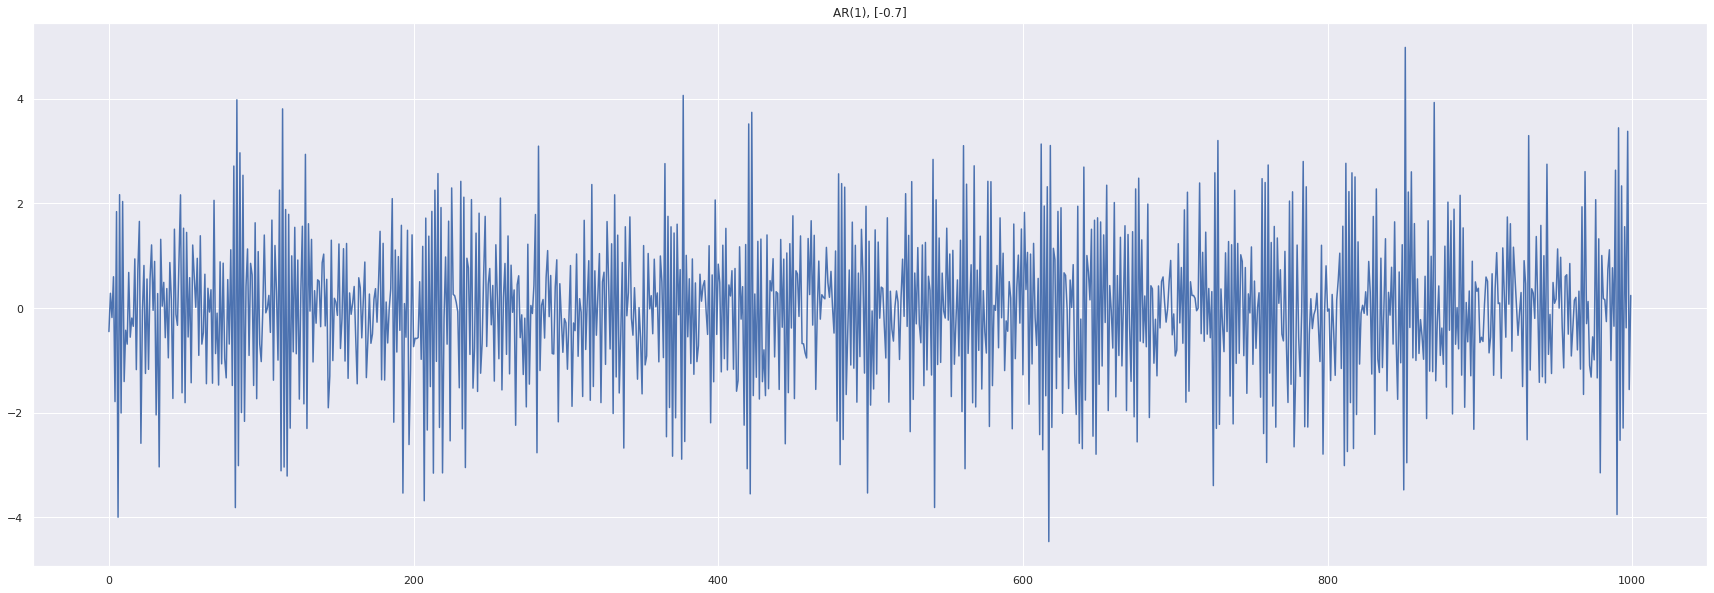

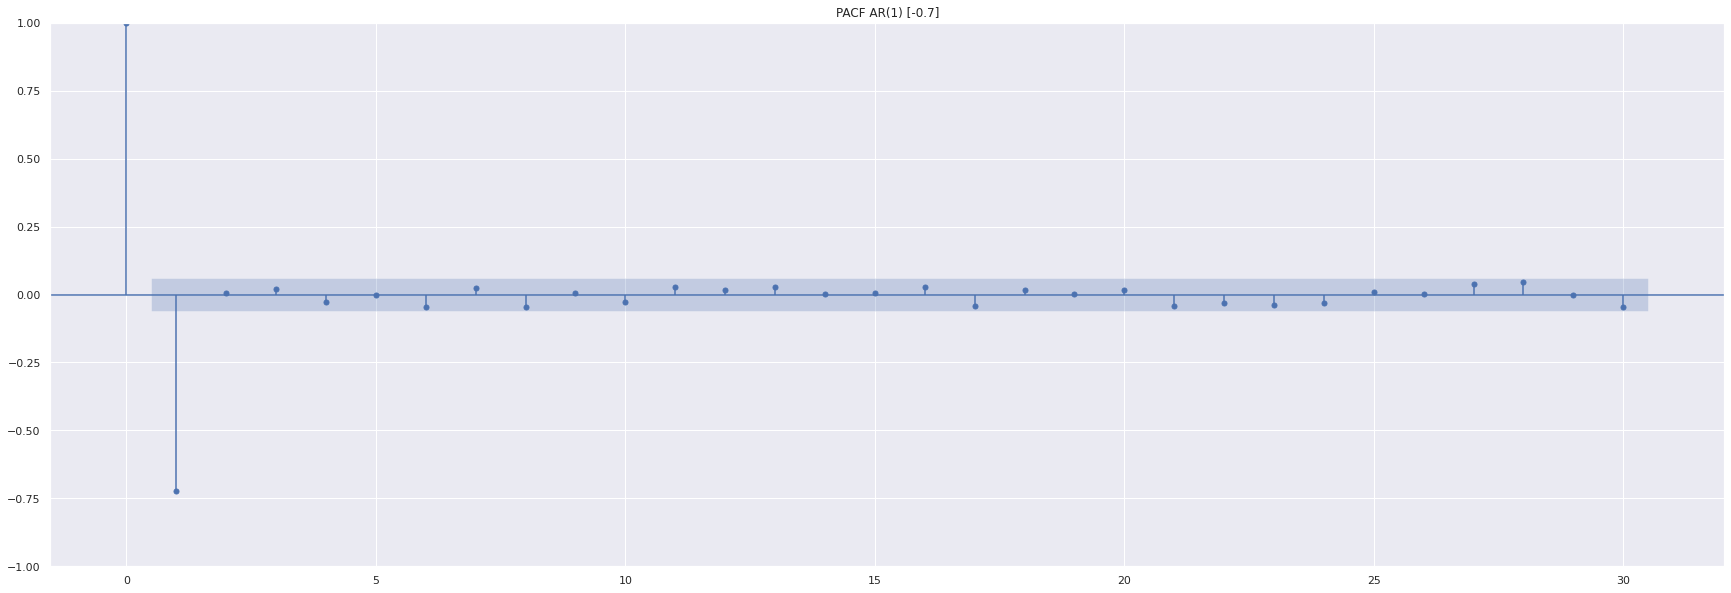

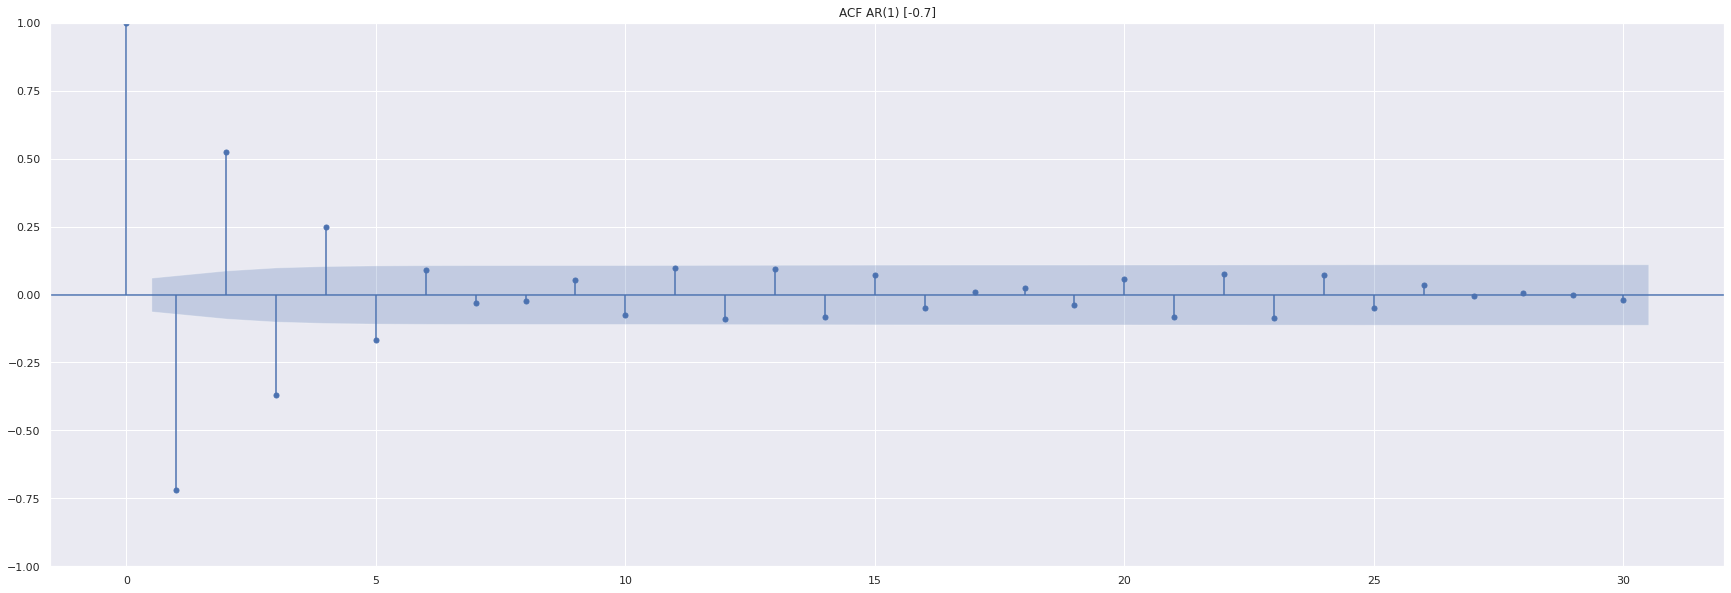

In [27]:
coefs = [-0.7]
X = create_ar(1, coefs, 1000)
print(pacf(X))
plt.plot(X)
plt.title(f"AR(1), {coefs}")
plot_pacf(X)
plt.title(f"PACF AR(1) {coefs}")
plt.show()
plot_acf(X)
plt.title(f"ACF AR(1) {coefs}")
plt.show()

[ 1.          0.41304325 -0.33176146  0.18478491 -0.14708238  0.00106837
 -0.04685337  0.14253458 -0.0884646   0.03578448 -0.03973571 -0.05240407
 -0.1315266   0.04571154  0.0181896  -0.00332365  0.03188029  0.02517375
 -0.0912132  -0.02658434  0.06801337 -0.07103813 -0.09584245 -0.02076495
  0.08029548]


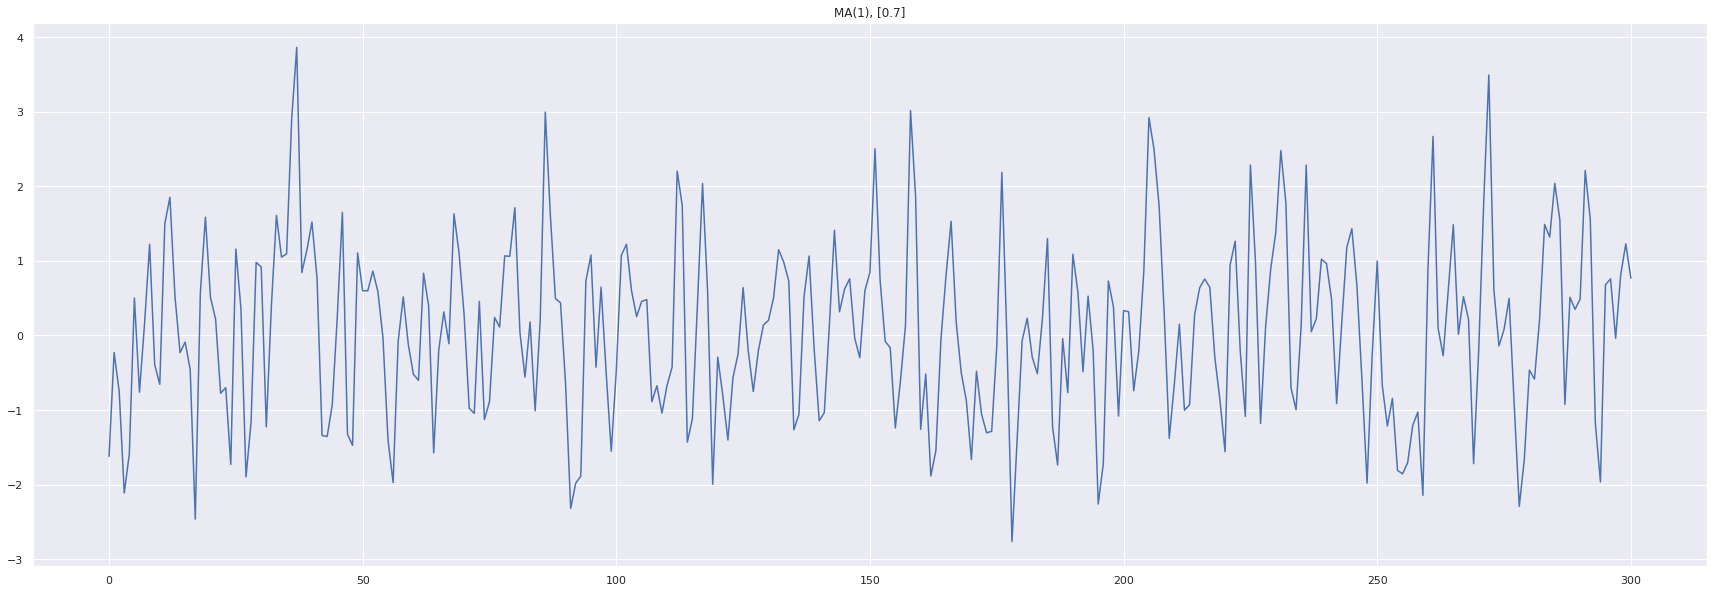

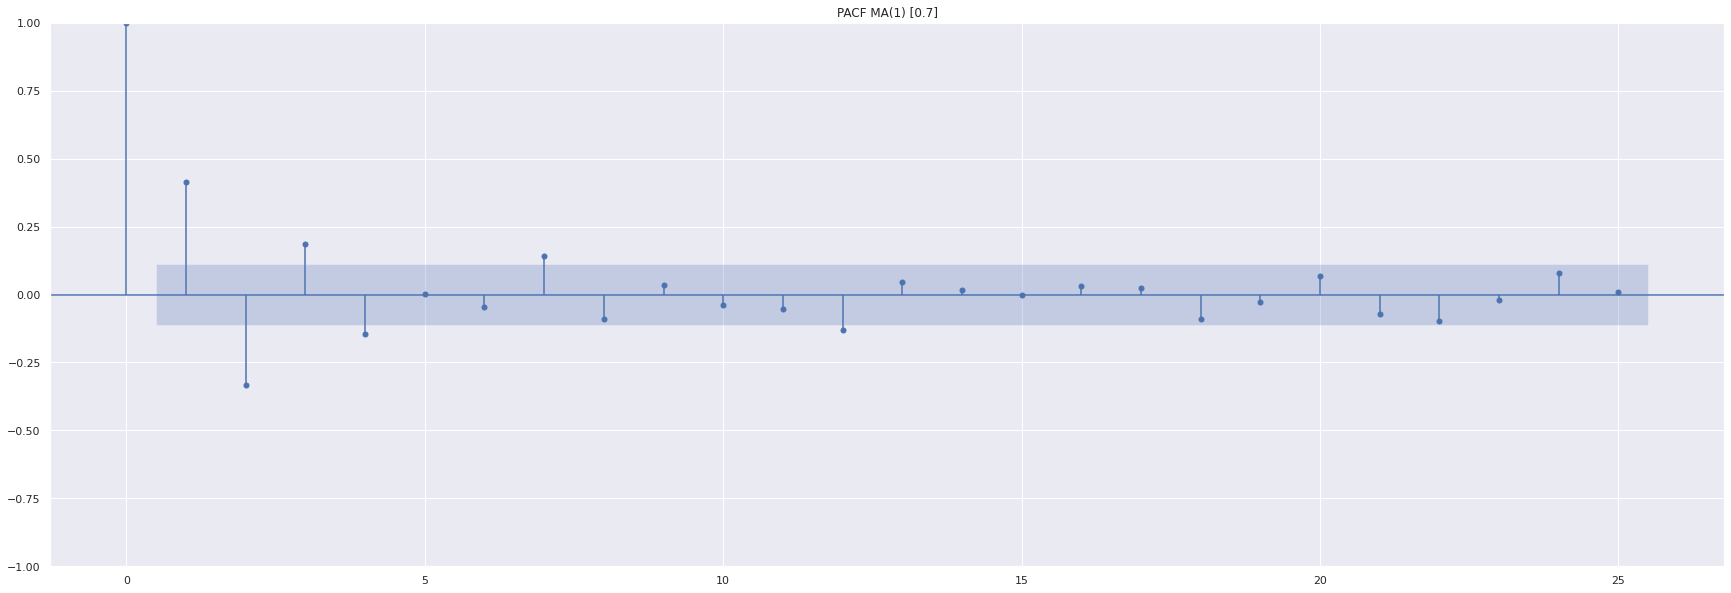

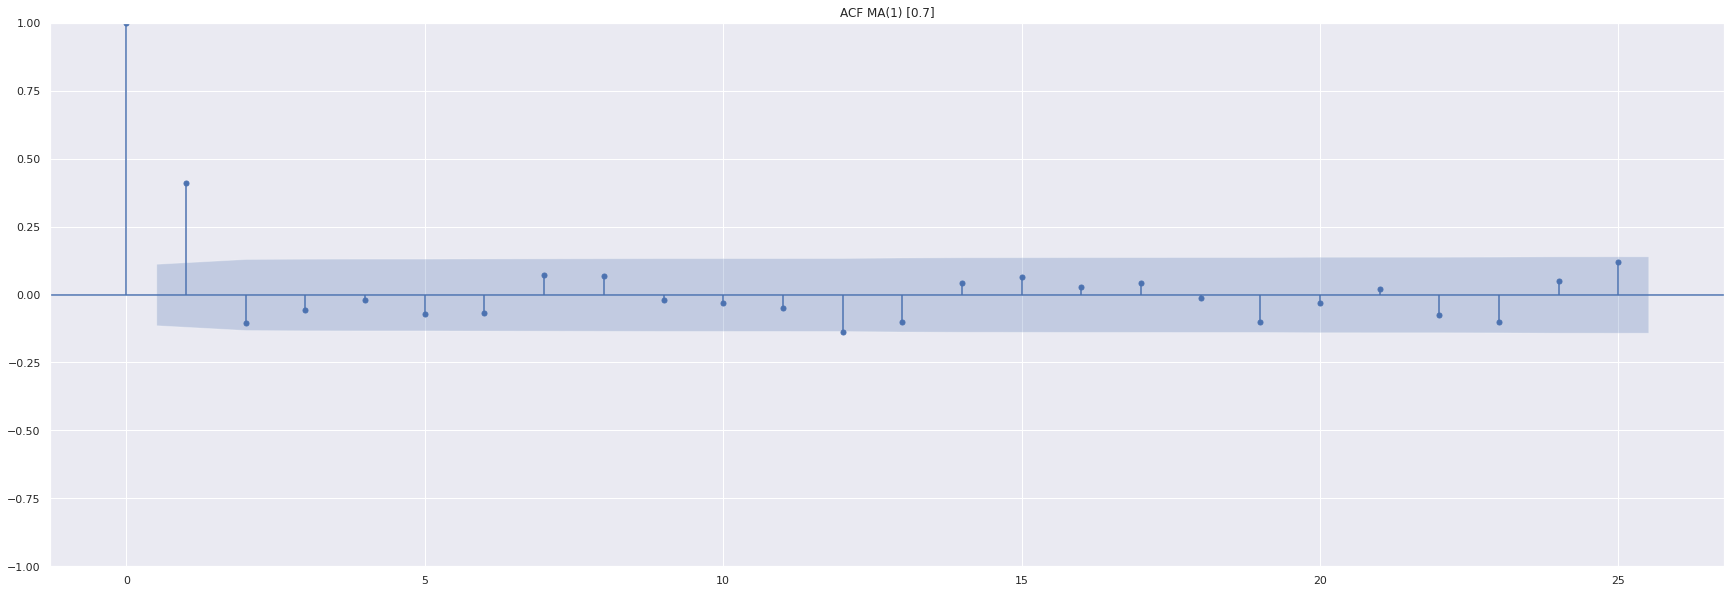

In [28]:
coefs = [0.7]
X = create_ma(1, coefs, 300)
print(pacf(X))
plt.plot(X)
plt.title(f"MA(1), {coefs}")
plot_pacf(X)
plt.title(f"PACF MA(1) {coefs}")
plt.show()
plot_acf(X)
plt.title(f"ACF MA(1) {coefs}")
plt.show()

1
[ 1.          0.6407669  -0.09031214 -0.11408972  0.00921482  0.07419258
 -0.03830263  0.03213784  0.05948342  0.00591139  0.05998688  0.02194431
  0.05482035 -0.02079644  0.08364133 -0.05619715  0.11712211  0.09125282
 -0.07652404 -0.00700496  0.01308617  0.09507063 -0.06047038  0.13995558
 -0.09347992]


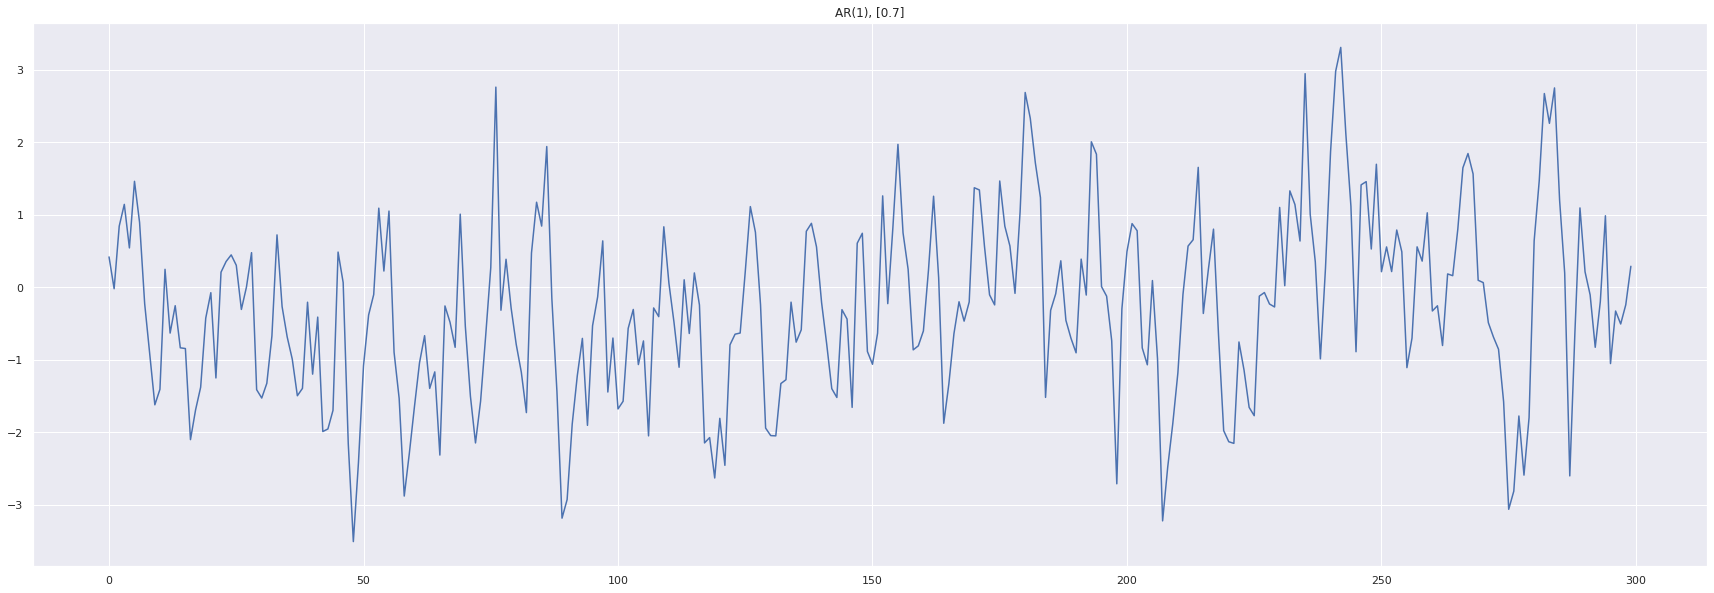

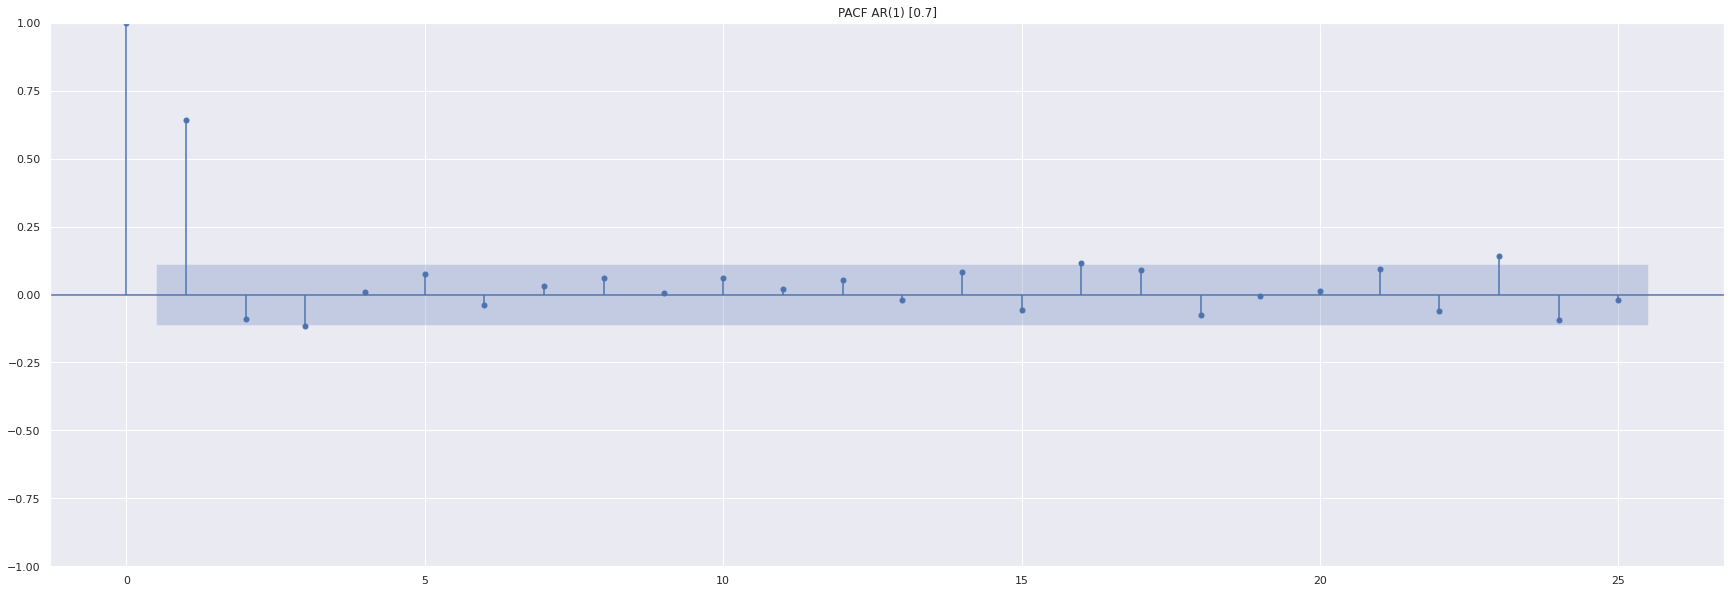

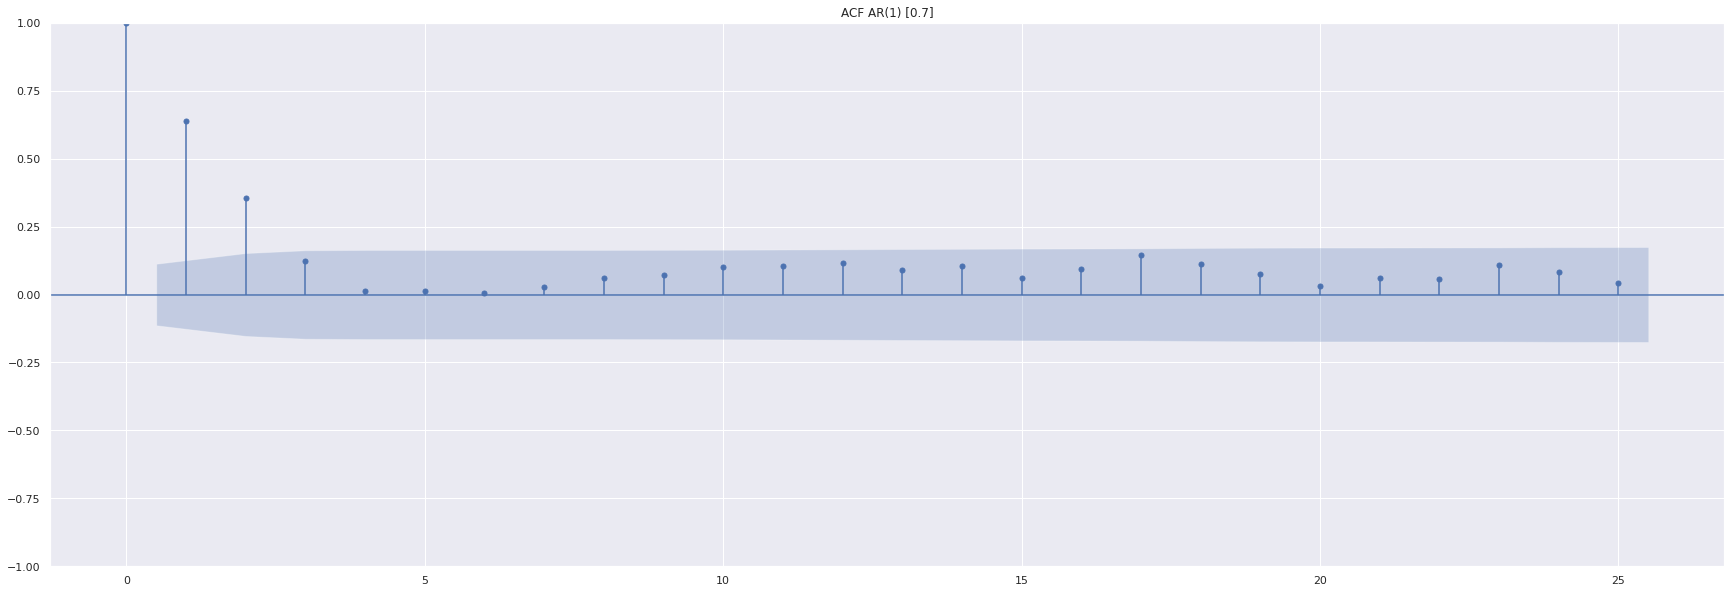

In [29]:
coefs = [0.7]
X = create_ar(1, coefs, 300)
print(pacf(X))
plt.plot(X)
plt.title(f"AR(1), {coefs}")
plot_pacf(X)
plt.title(f"PACF AR(1) {coefs}")
plt.show()
plot_acf(X)
plt.title(f"ACF AR(1) {coefs}")
plt.show()

In [30]:
X = create_ar(2, [0.99, 0.3], 2000)
print(X)
pacf(X)

2
[-8.51998077e-001 -4.82346632e-001 -9.46997756e-001 ... -8.83777690e+179
 -1.08992598e+180 -1.34416003e+180]


/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1446: RuntimeWarning: overflow encountered in square
  r[0] = (x ** 2).sum() / n
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1448: RuntimeWarning: overflow encountered in multiply
  r[k] = (x[0:-k] * x[k:]).sum() / (n - k * adj_needed)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


array([ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [31]:
phis = [0.4, 0.3]
thetas = [0.3, 0.3]
X = create_arma(p=2, q = 2, phis = [0.4, 0.3], thetas = [0.3, 0.3], time_points = 200)

Text(0.5, 1.0, 'ARMA(2,2), X_t = 0.4X_t-1 + 0.3X_t-2 + 0.3 W_t-1 + 0.3 W_t-2 + W_t')

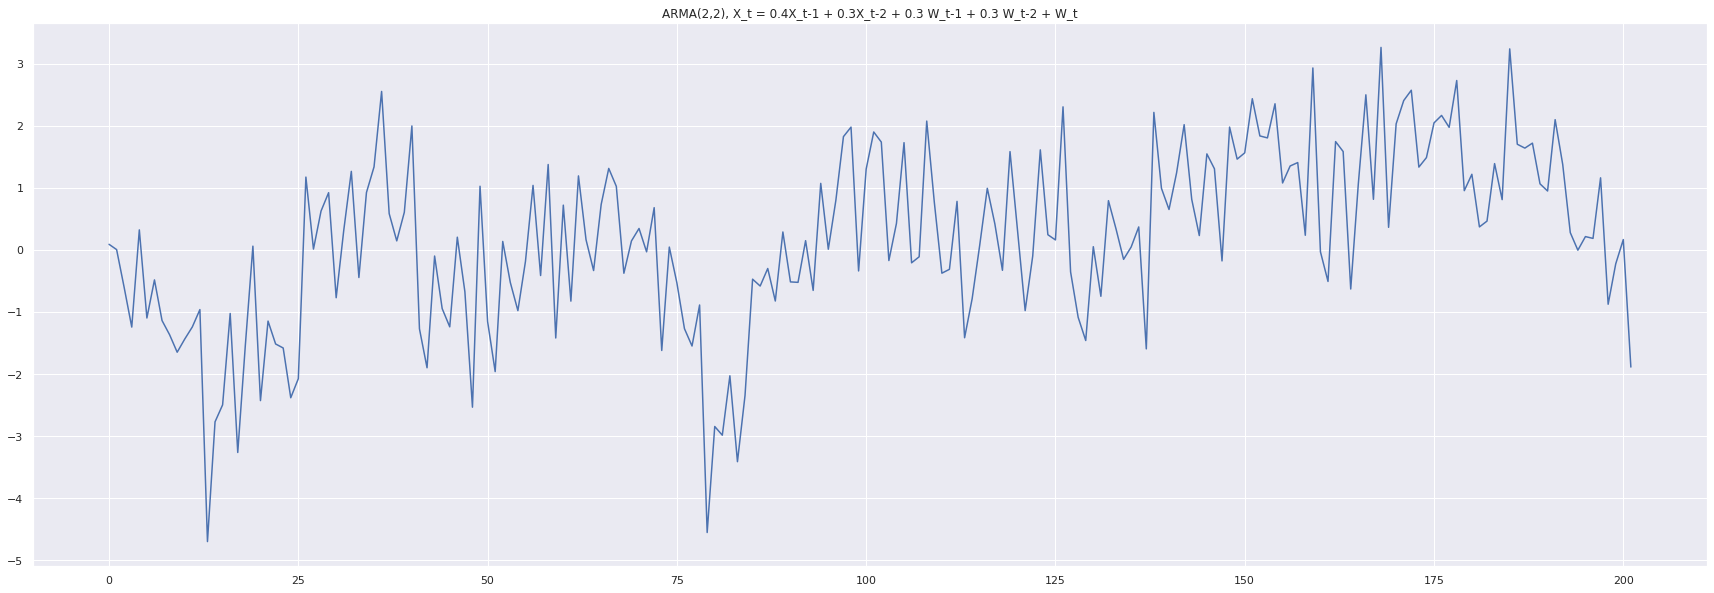

In [32]:
plt.plot(X)
plt.title(f"ARMA(2,2), X_t = 0.4X_t-1 + 0.3X_t-2 + 0.3 W_t-1 + 0.3 W_t-2 + W_t")

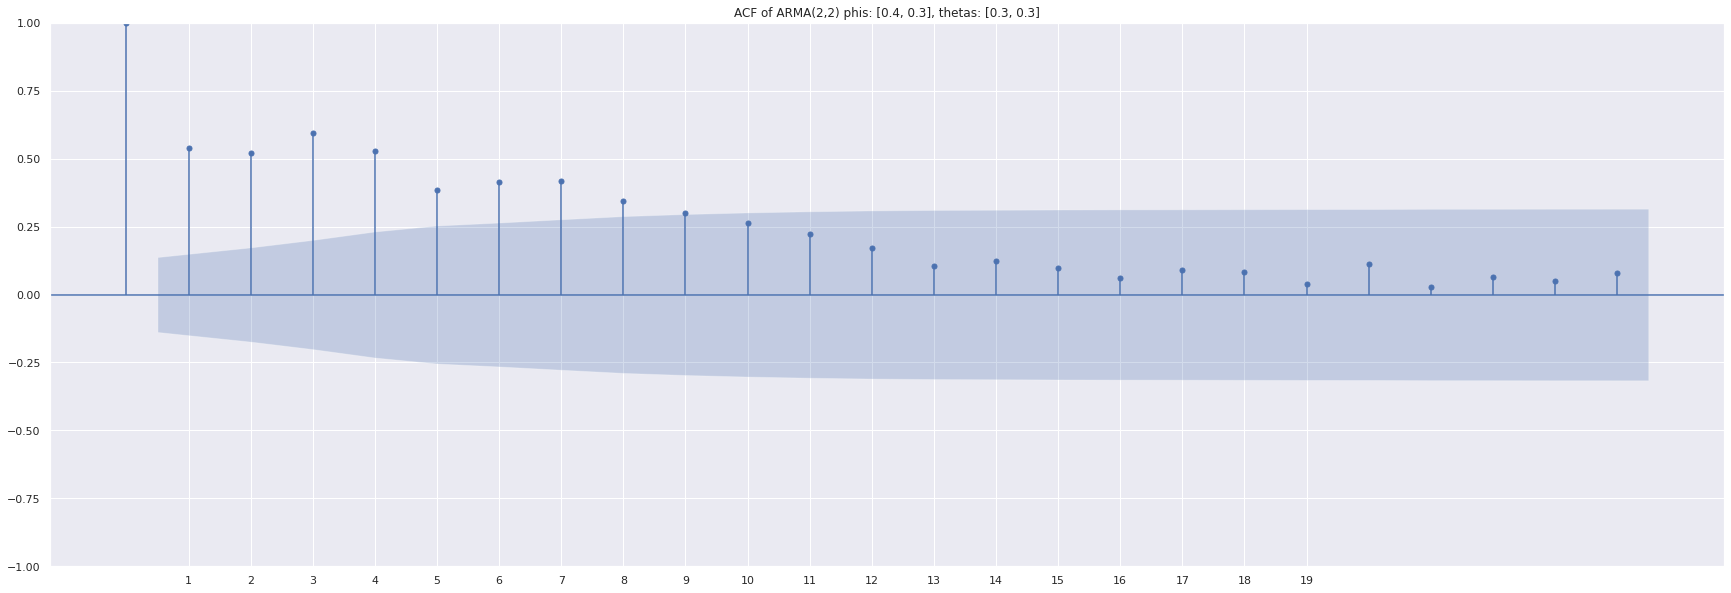

In [33]:
plot_acf(np.array(X))
plt.title(f"ACF of ARMA(2,2) phis: {phis}, thetas: {thetas}")
plt.xticks([i for i in range(1,20)])
plt.show()

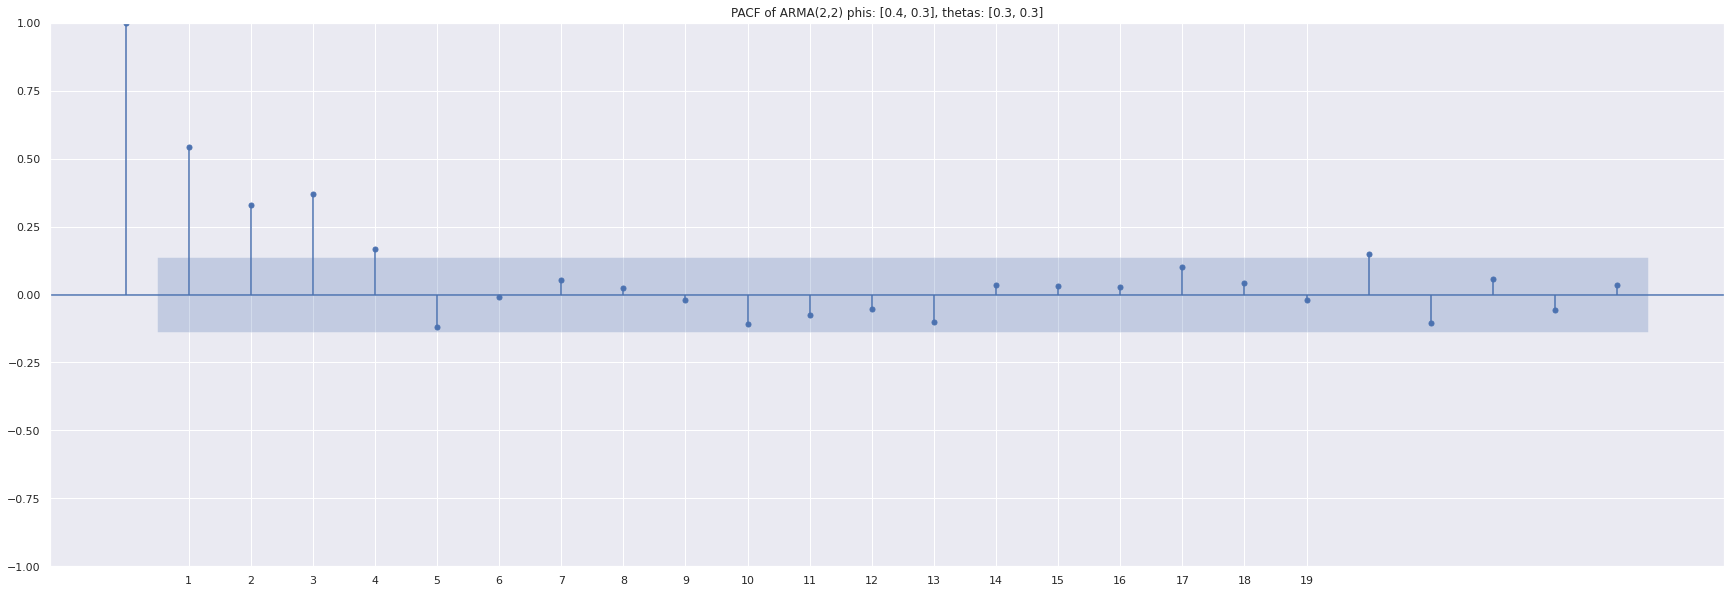

In [34]:
plot_pacf(np.array(X))
plt.title(f"PACF of ARMA(2,2) phis: {phis}, thetas: {thetas}")
plt.xticks([i for i in range(1,20)])
plt.show()

2
[ 1.          0.87791289 -0.00161871 -0.00180091 -0.00198874 -0.00218163
 -0.00236663 -0.00255023 -0.00274534 -0.00293532 -0.0031389  -0.0033391
 -0.00353877 -0.00375409 -0.00395493 -0.0041824  -0.00440336 -0.00463156
 -0.00486293 -0.00510998 -0.00535537]


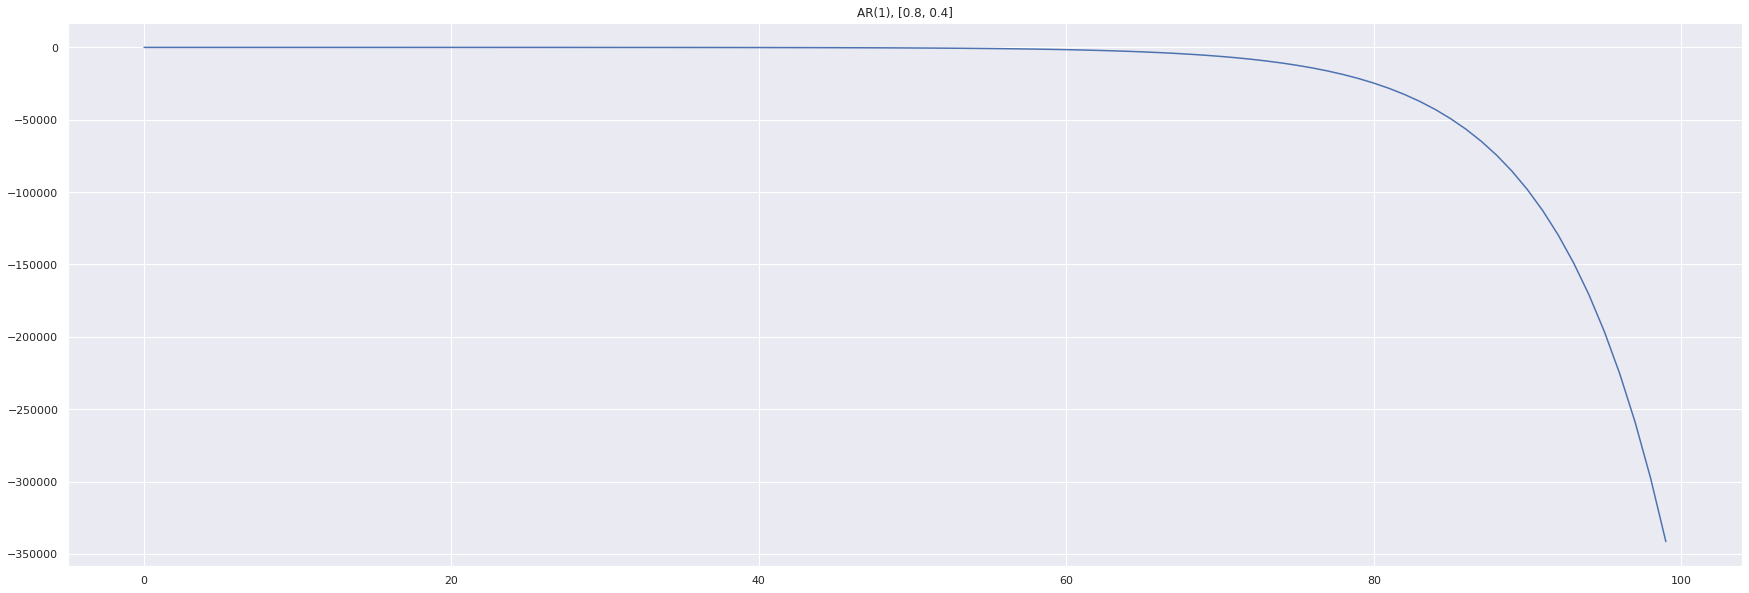

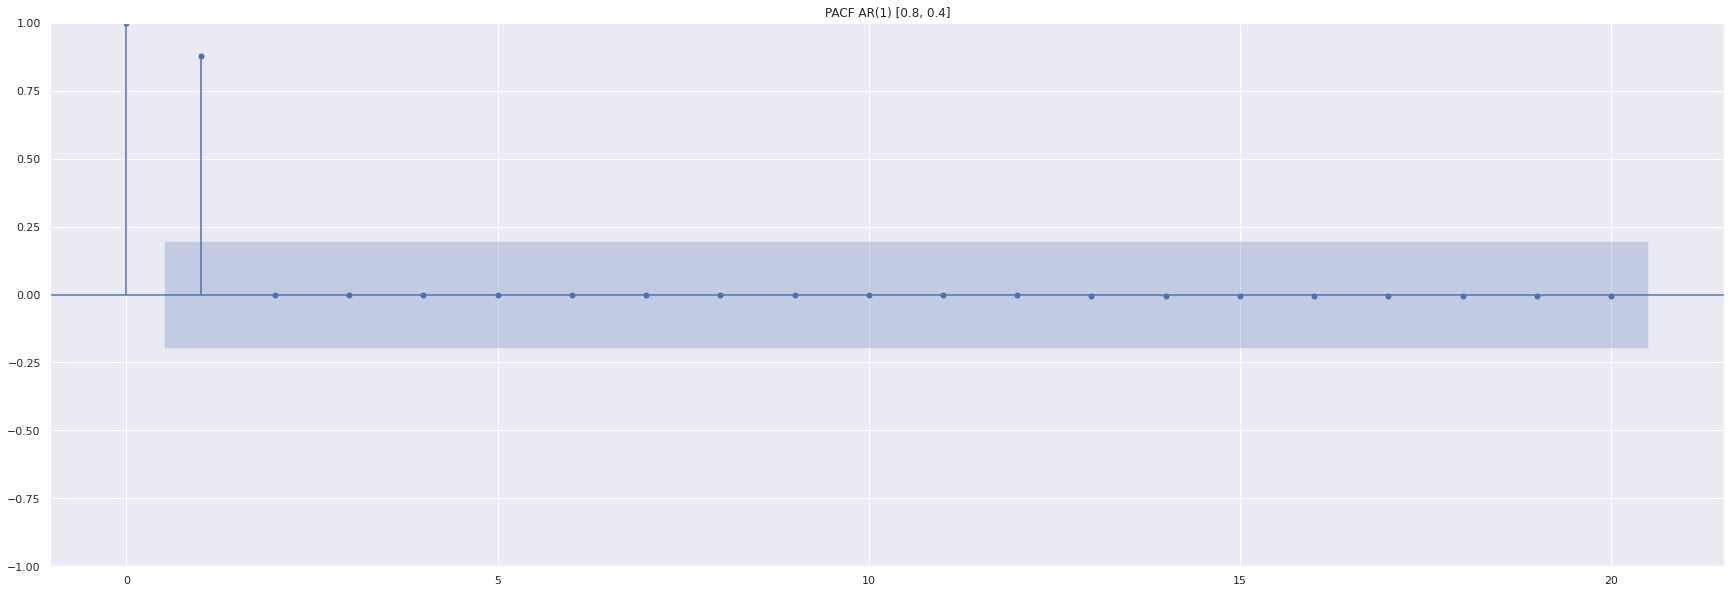

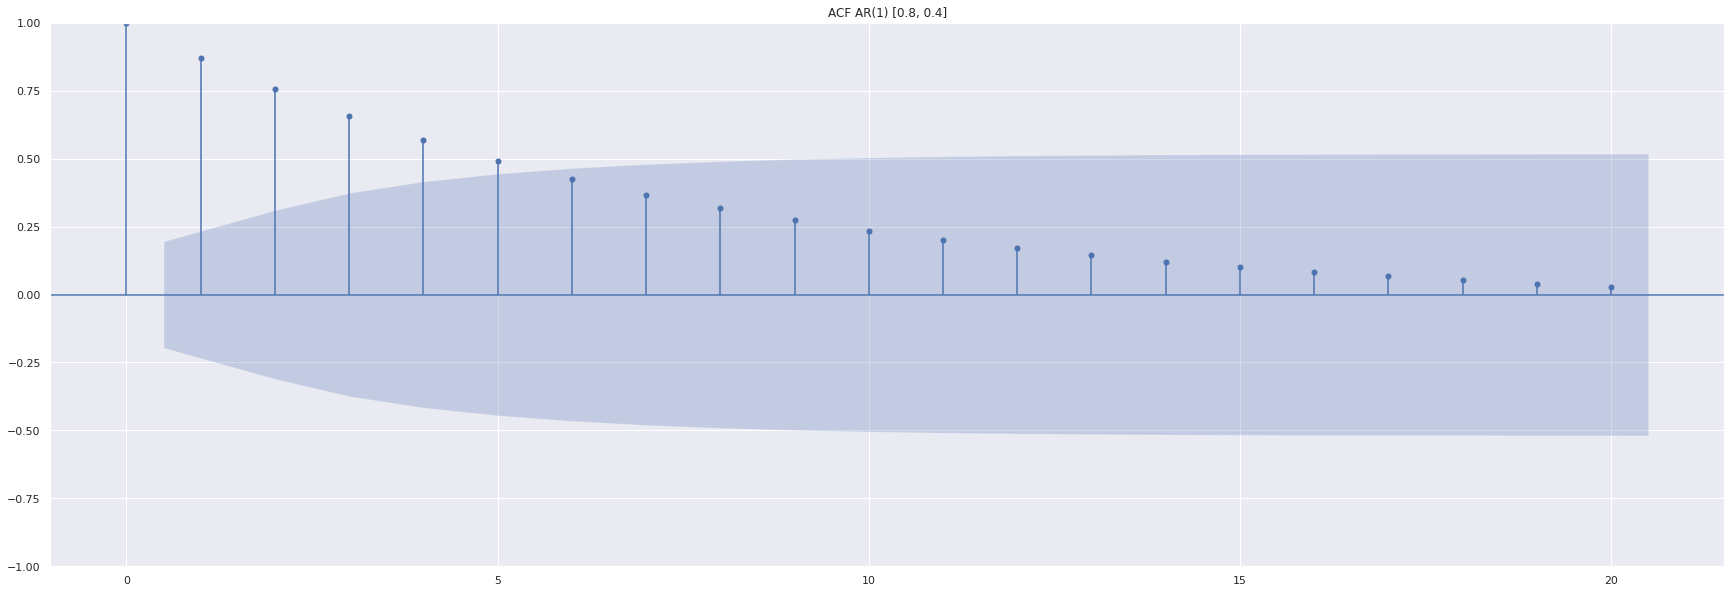

In [35]:
coefs = [0.8, 0.4]
X = create_ar(2, coefs, 100)
print(pacf(X))
plt.plot(X)
plt.title(f"AR(1), {coefs}")
plot_pacf(X)
plt.title(f"PACF AR(1) {coefs}")
plt.show()
plot_acf(X)
plt.title(f"ACF AR(1) {coefs}")
plt.show()

2
[ 1.00000000e+00  4.02311829e-01 -8.95926117e-02  3.41415791e-02
 -9.33446311e-02 -8.13017895e-02  1.19435021e-01 -9.63226577e-02
 -8.82623266e-03 -2.30569031e-02 -4.31333095e-02  9.64594480e-05
  1.55791230e-02  7.98078284e-03  6.23190119e-02 -1.67157457e-01
 -4.77696943e-02 -6.19646999e-02 -1.25437249e-01 -2.09306840e-01
 -1.69528199e-02]


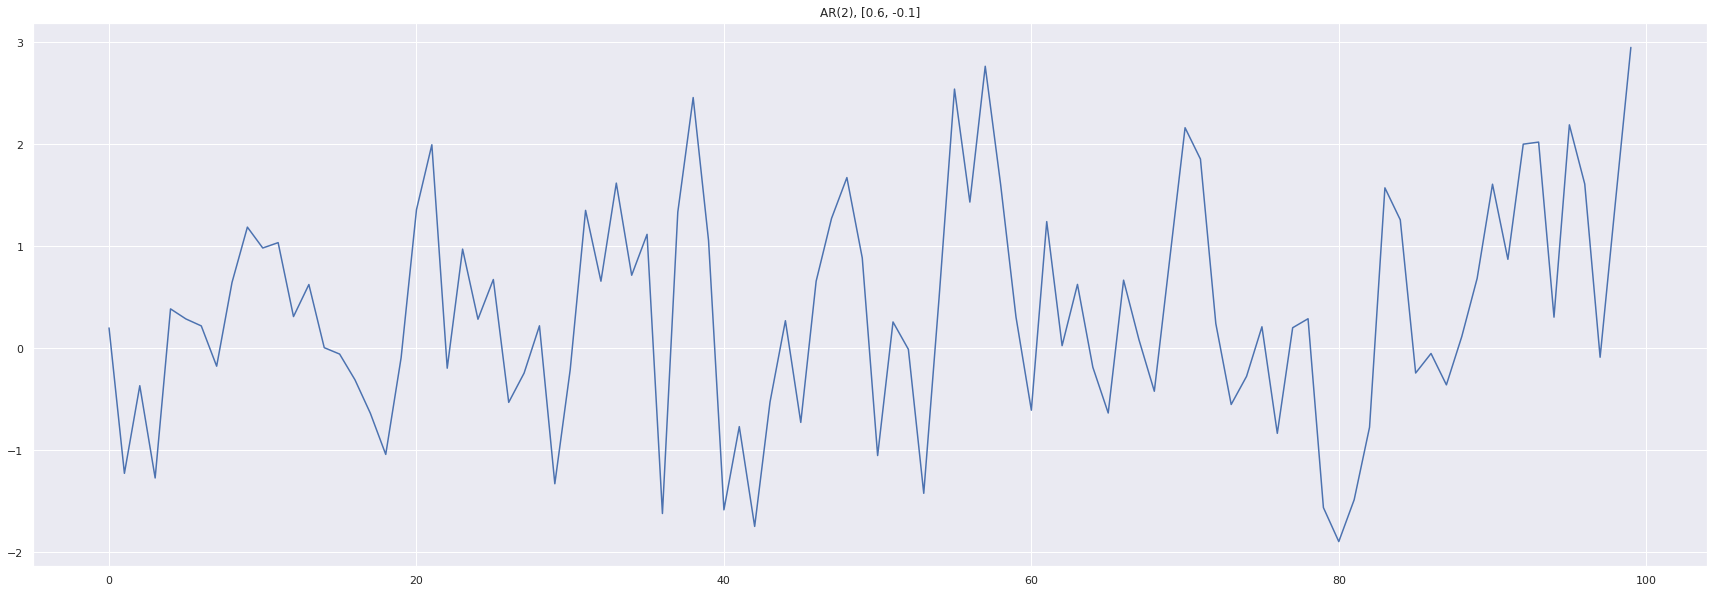

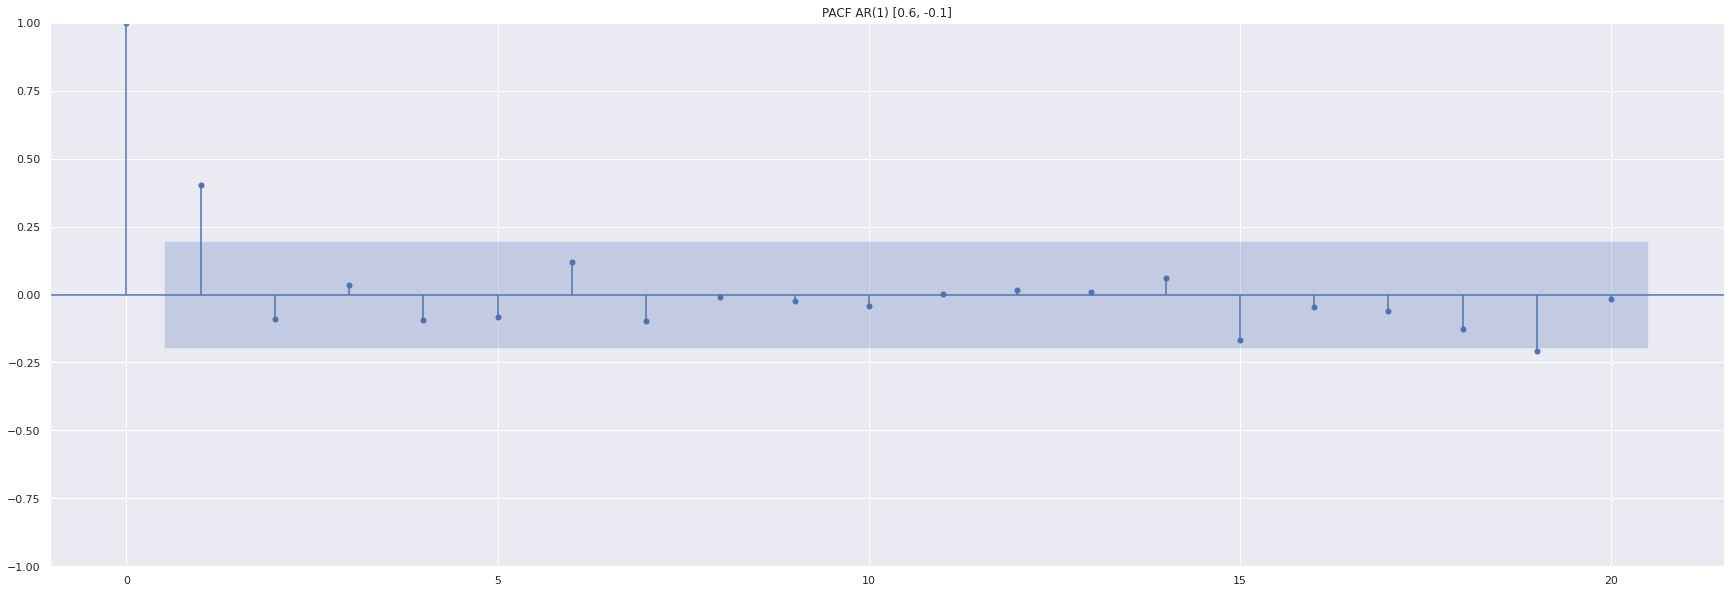

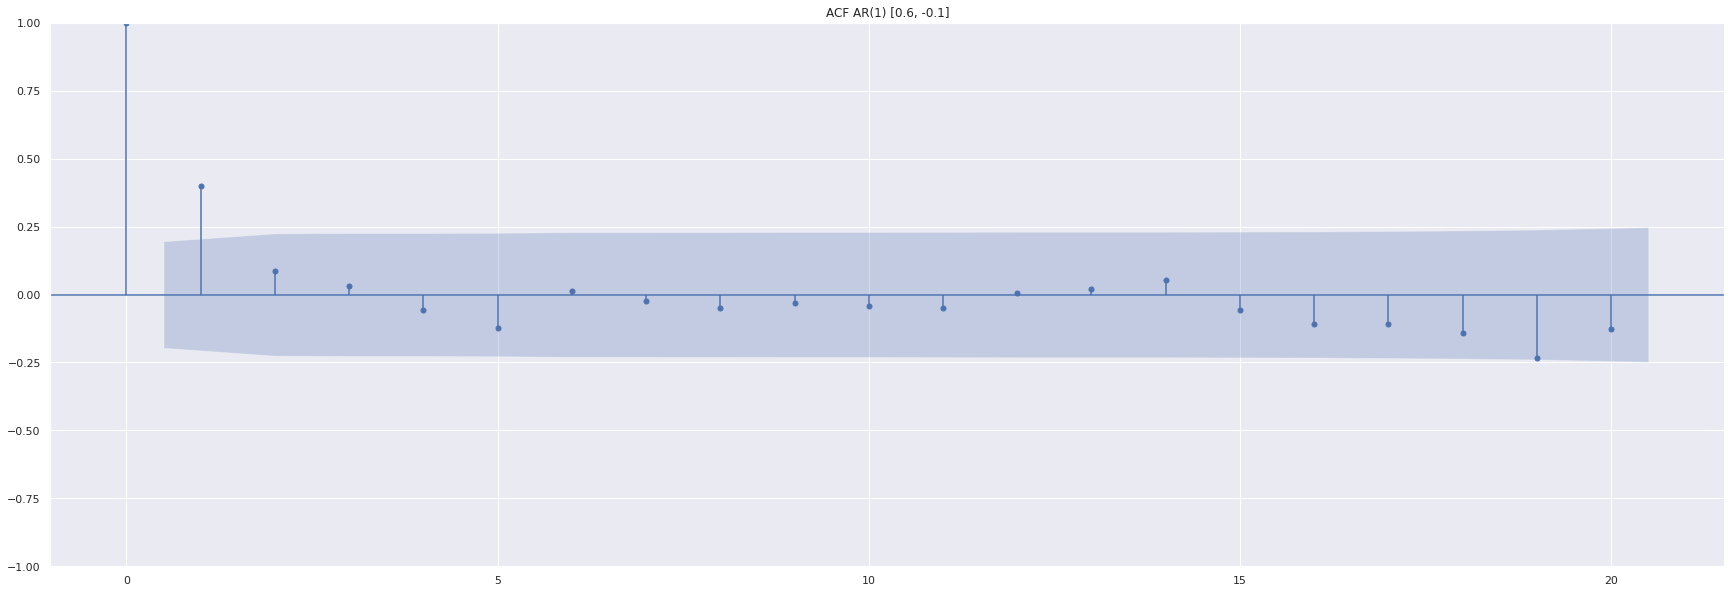

In [36]:
coefs = [0.6, -0.1]
X = create_ar(2, coefs, 100)
print(pacf(X))
plt.plot(X)
plt.title(f"AR(2), {coefs}")
plot_pacf(X)
plt.title(f"PACF AR(1) {coefs}")
plt.show()
plot_acf(X)
plt.title(f"ACF AR(1) {coefs}")
plt.show()

2
[ 1.         -0.63078995  0.83103151 -0.3133959   0.04657323 -0.20176465
 -0.17852503  0.00416791 -0.01354839 -0.01664006  0.01165007 -0.01192673
  0.00958869 -0.06586332 -0.20906942 -0.0605289  -0.29186163  0.09688235
 -0.13617554 -0.07940261  0.15886441]


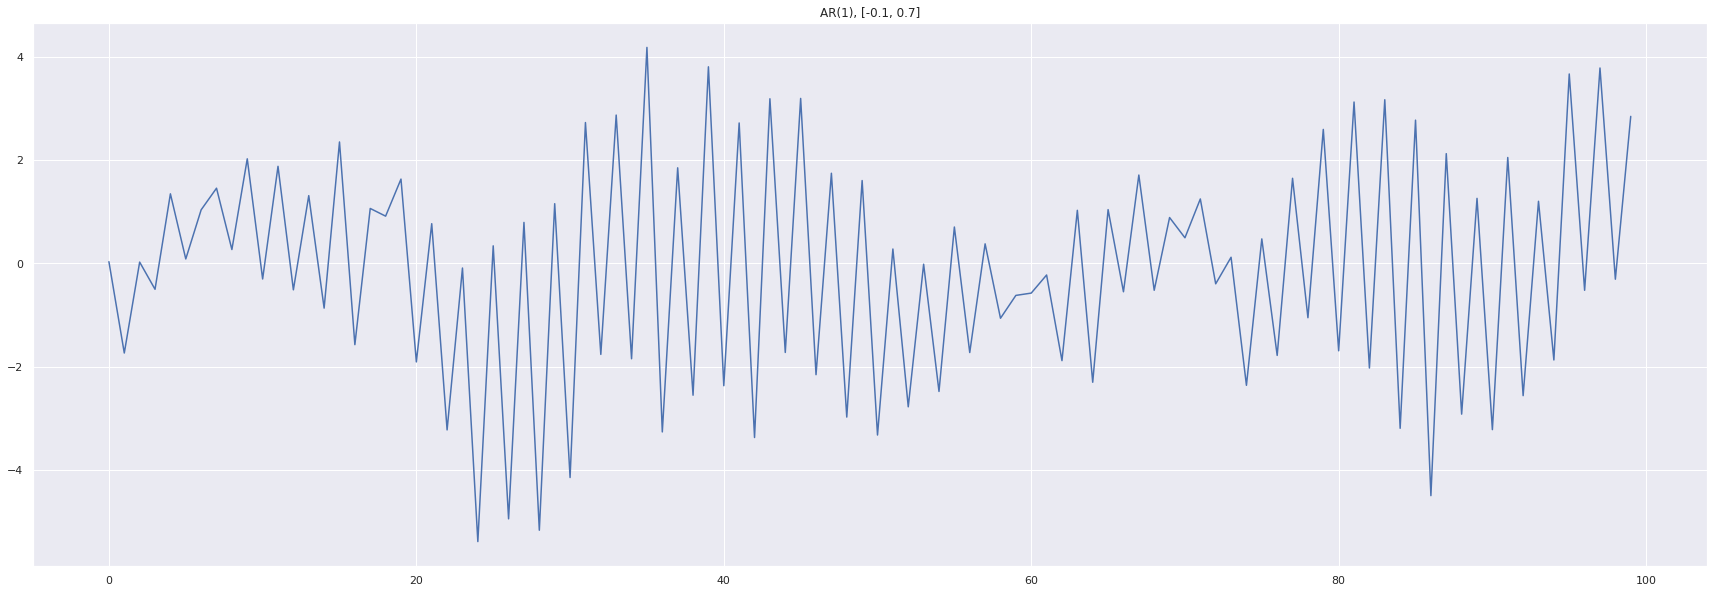

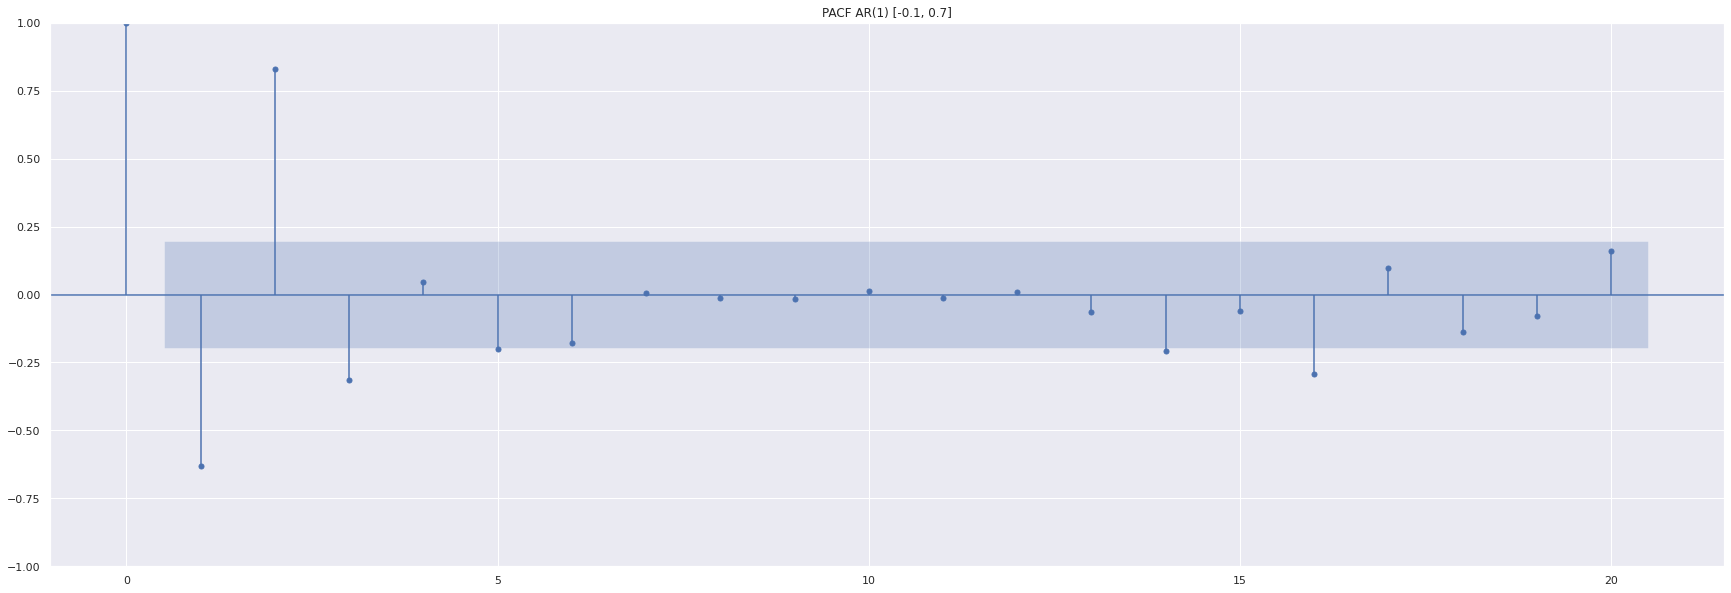

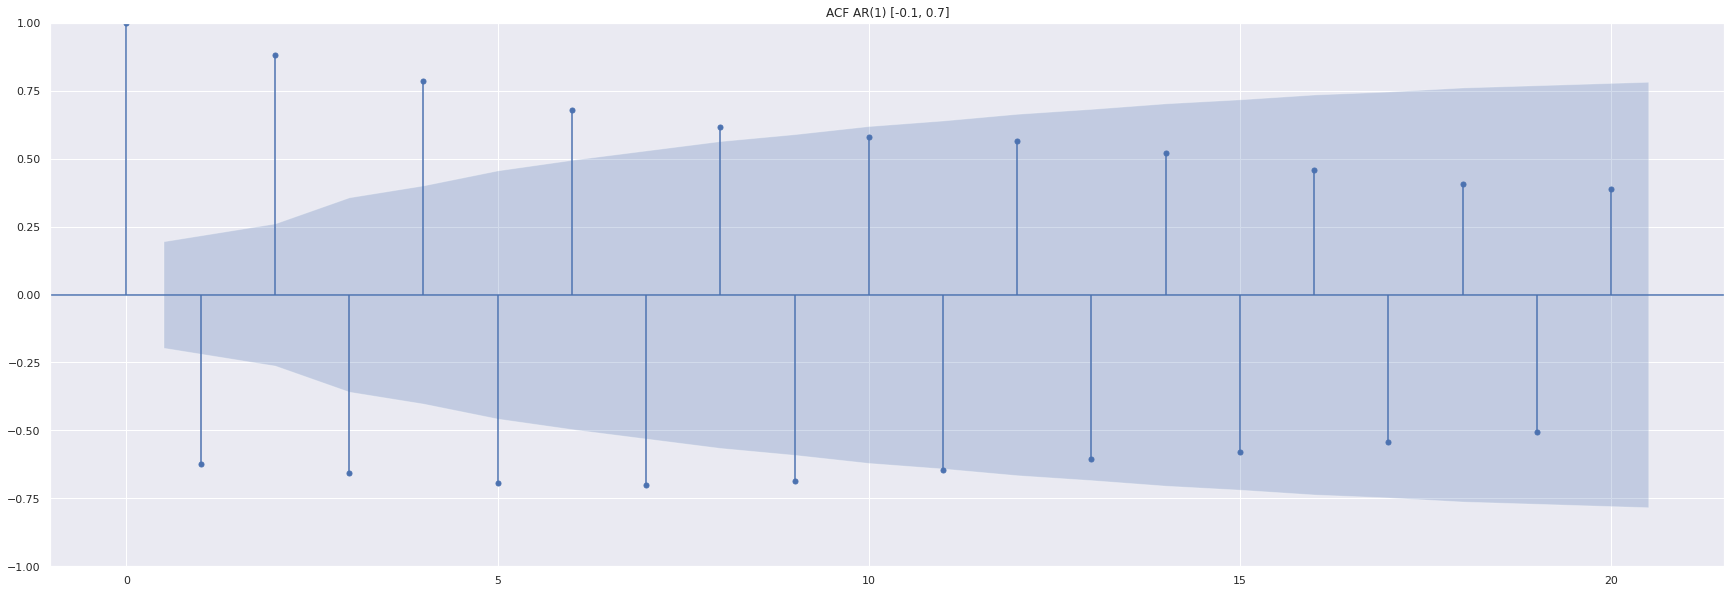

In [37]:
coefs = [-0.1, 0.7]
X = create_ar(2, coefs, 100)
print(pacf(X))
plt.plot(X)
plt.title(f"AR(1), {coefs}")
plot_pacf(X)
plt.title(f"PACF AR(1) {coefs}")
plt.show()
plot_acf(X)
plt.title(f"ACF AR(1) {coefs}")
plt.show()

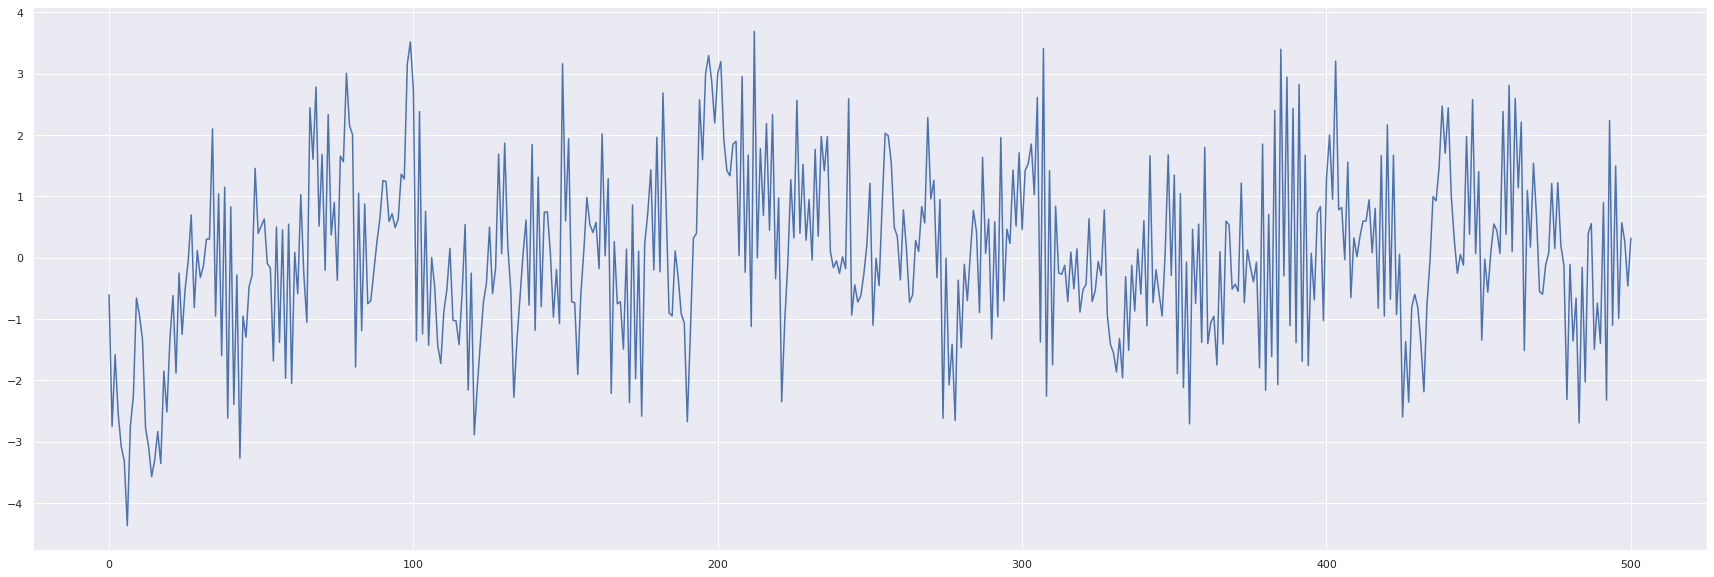

In [38]:
phis = [0.7]
thetas = [0.2]
X = create_arma(p=1, q = 1, phis = phis, thetas = thetas, time_points = 500)
plt.plot(X)
plt.show()

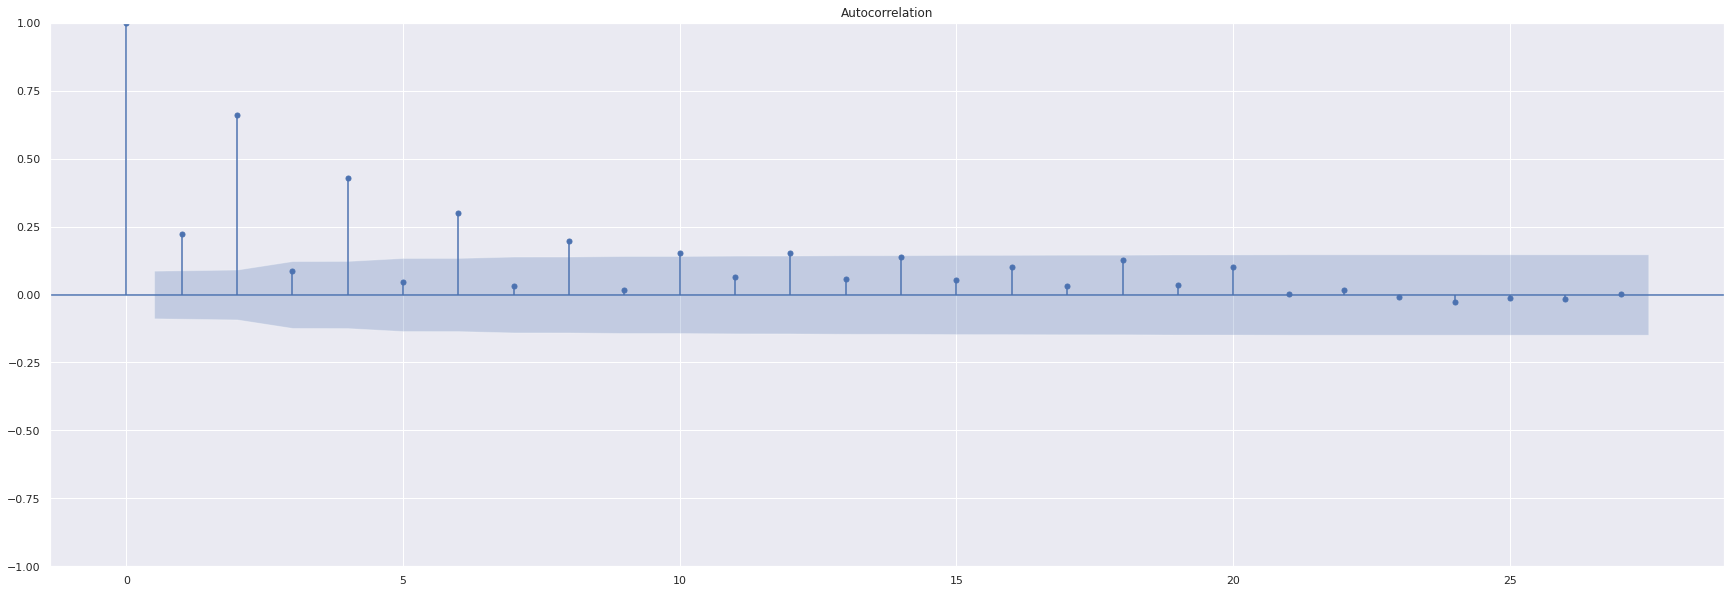

In [39]:
plot_acf(X)
plt.show()

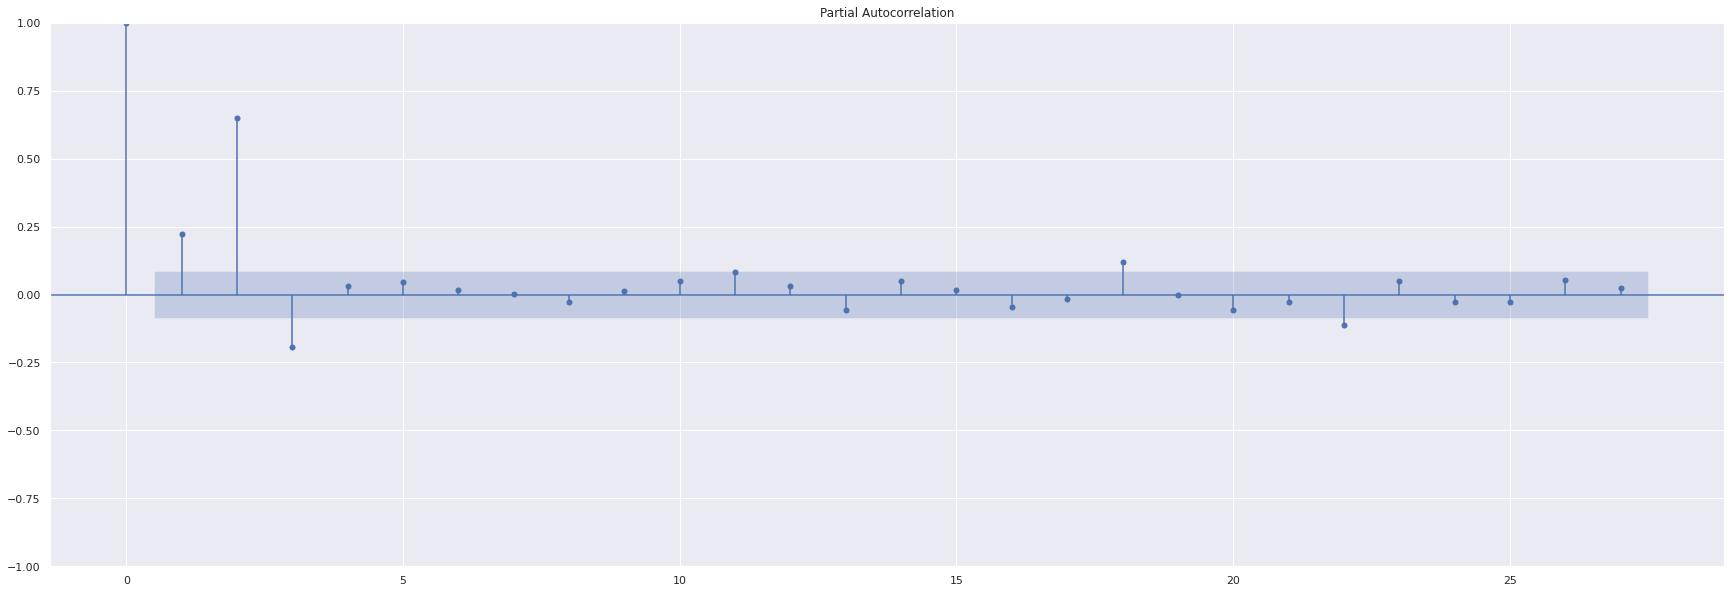

In [40]:
plot_pacf(X)
plt.show()

## Differencing

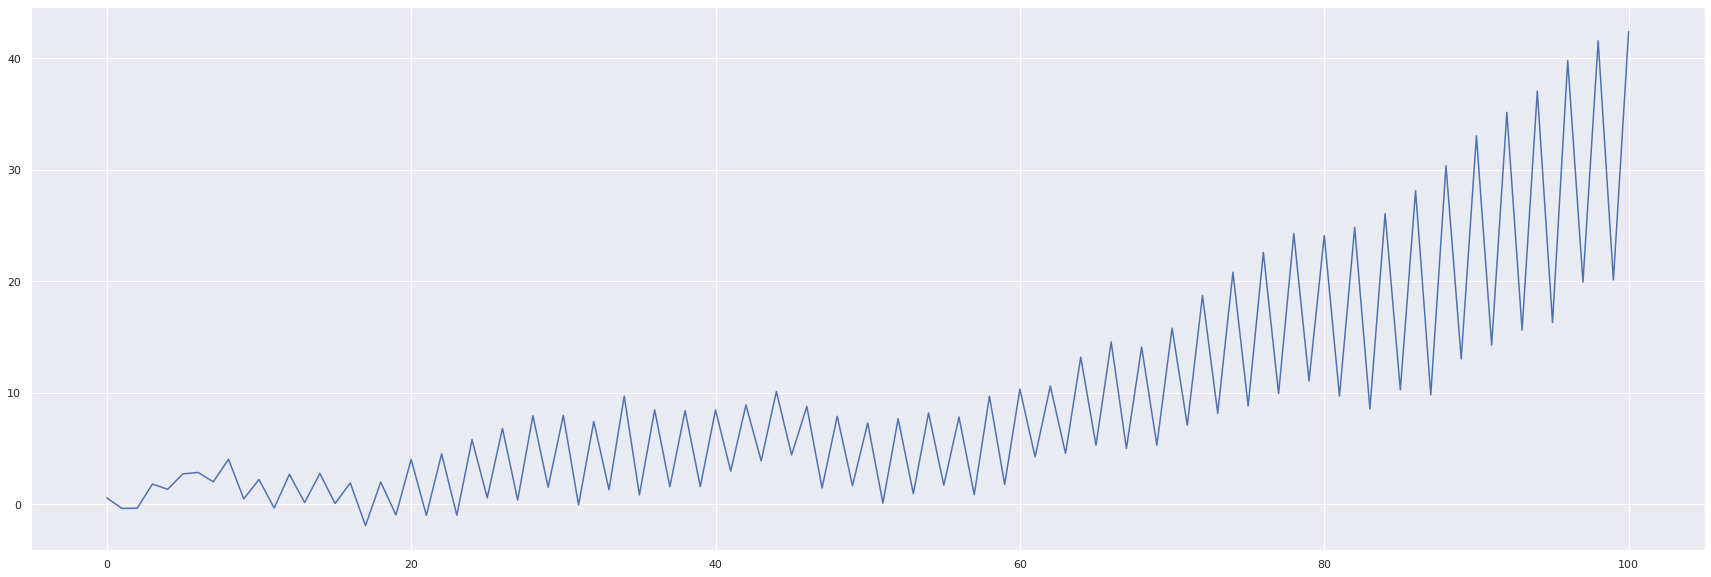

In [41]:
phis = [1.05]
thetas = [0.5]
X = create_arma(p=1, q = 1, phis = phis, thetas = thetas, time_points = 100)
plt.plot(X)
plt.show()

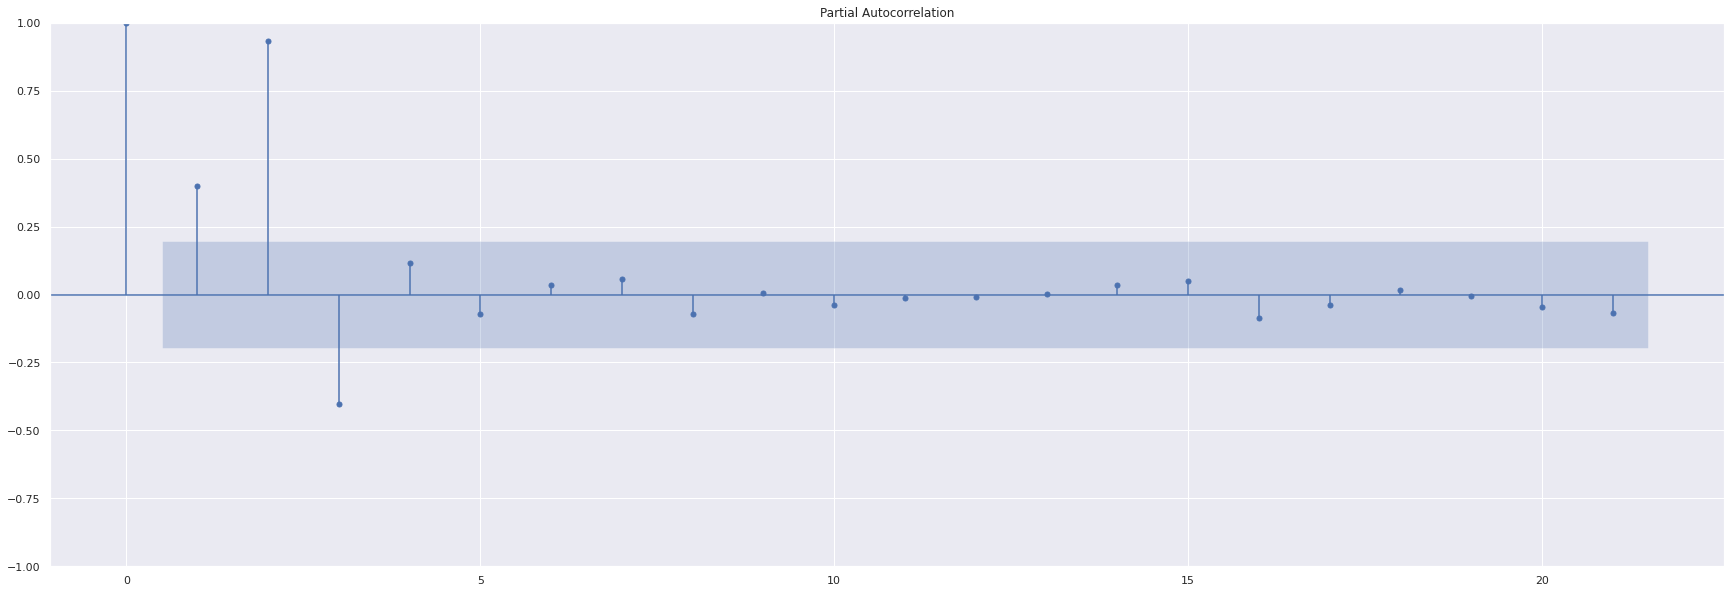

In [42]:
plot_pacf(X)
plt.show()

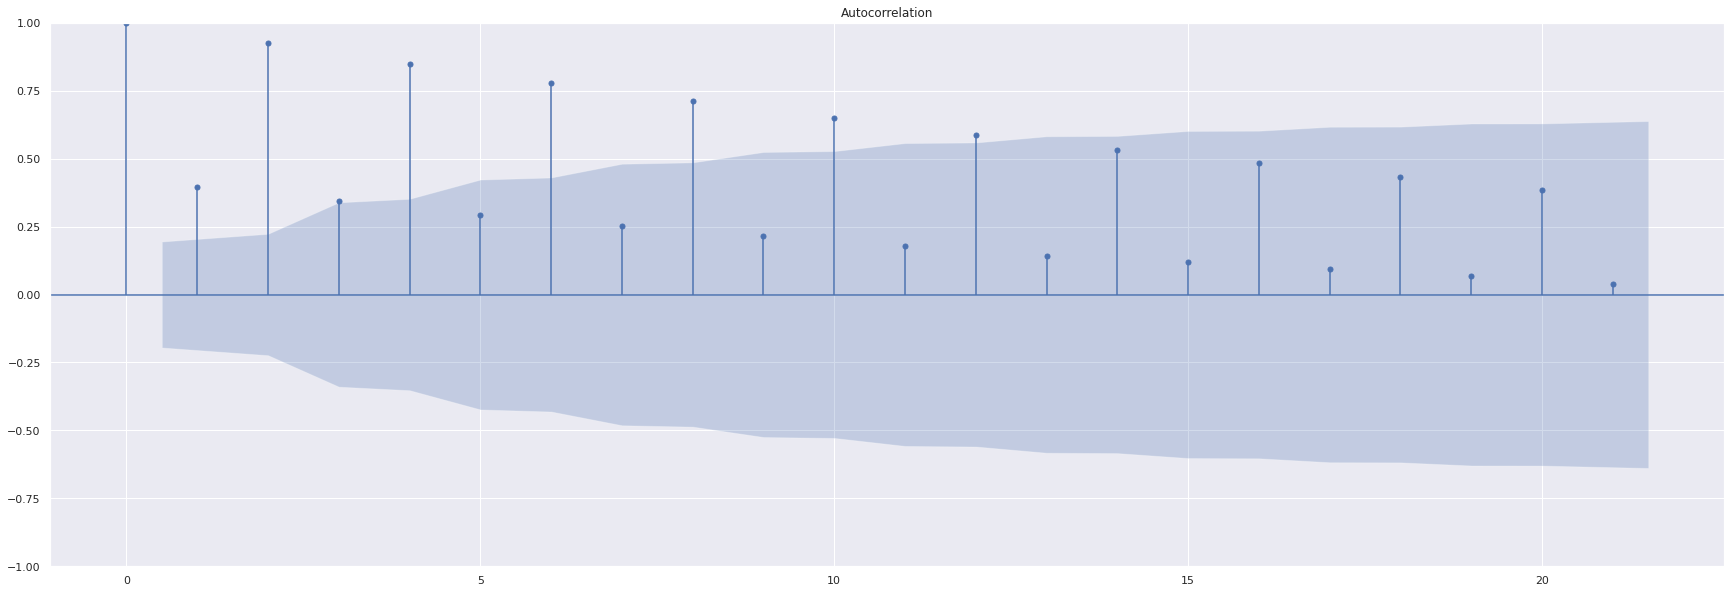

In [43]:
plot_acf(X)
plt.show()

In [44]:
DX = X[:-1] - X[1:]

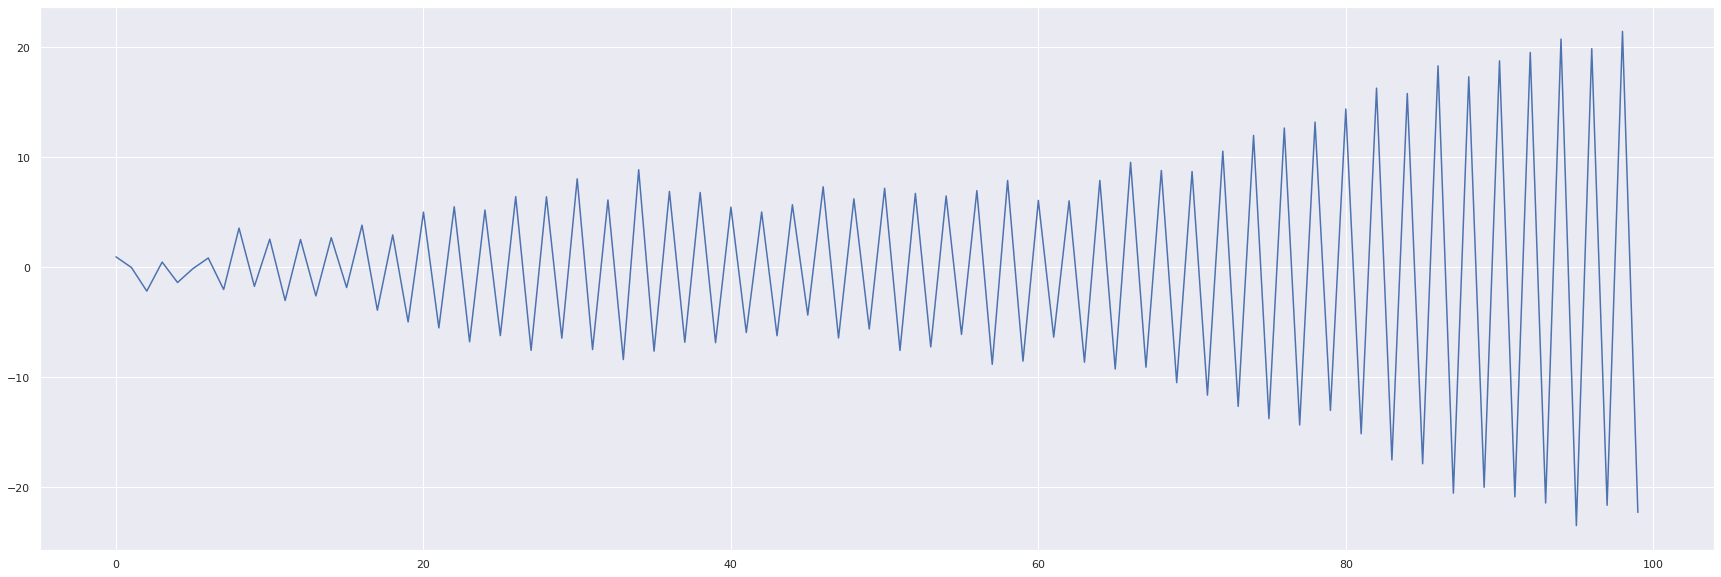

In [45]:
plt.plot(DX)